# Contents
--------------------------------------------------------------
--------------------------------------------------------------


**1. Initial Setup**

**2. Data Inspection**

**3. Data Cleaning**

**4. Feature Engineering (Data Preparation)**

**5. EDA**

**6. Feature Scaling and Preprocessing**

**7. Modelling (with Hyperparameter tuning)**

    i) Interpretable models (without PCA)
            Logistic Regression
    ii) High performance models (with PCA)
            Logistic Regression
            Random Forest
            SVM
            XGBoost
    
**8. Model Evaluation**

**9. Inferences and Recommendations**

-----------------------------------------------------------------------------
-----------------------------------------------------------------------------

# 1. Initial setup

### 1.1 Import required libraries


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as m
import matplotlib.pyplot as plt
from math import isnan
from random import sample
from numpy.random import uniform
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import sklearn

from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
#from sklearn.metrics import sensitivity_specificity_support
from sklearn.metrics import roc_auc_score
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, KFold, cross_val_score
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

### 1.2 Handle warnings

In [2]:
import warnings
warnings.filterwarnings('ignore')

### 1.3 Load the dataset

In [3]:
telecom = pd.read_csv('telecom_churn_data.csv')

In [4]:
telecom.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


### 1.4 Club columns into specific category

In [5]:
telecom.columns

Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6',
       ...
       'sachet_3g_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g'],
      dtype='object', length=226)

#### Columns like mobile_number and circle_id can serve as unique identity number for each customer as they are unique for a given cutomer
     We can have them both clubbed as id_columns
    
#### Similarly all the date columns can be combined into a list named date_columns.

#### We will also club the categorical columns under list named cat_columns

#### All the remaining columns are likely to fall under numerical category and we will put them in a list named num_columns

In [6]:
##id_columns

id_columns = ['mobile_number', 'circle_id']

In [7]:
#date_columns

date_columns = ['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9',
               'date_of_last_rech_6',  'date_of_last_rech_7',  'date_of_last_rech_8', 'date_of_last_rech_9',
               'date_of_last_rech_data_6',  'date_of_last_rech_data_7',  'date_of_last_rech_data_8',  'date_of_last_rech_data_9']

In [8]:
#cat_columns

cat_columns = ['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'night_pck_user_9',
              'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9']

In [9]:
#num_columns

num_columns = [col for col in telecom.columns if col not in id_columns + date_columns + cat_columns]

In [10]:
## Printing the summary

print(' Number of ID Columns : %d \n Number of Date Columns : %d \n Number of Categorical Columns : %d \n Number of Numeric Columns : %d'  % (len(id_columns), len(date_columns), len(cat_columns), len(num_columns)))

 Number of ID Columns : 2 
 Number of Date Columns : 12 
 Number of Categorical Columns : 8 
 Number of Numeric Columns : 204


## 2.  Data Inspection

In [11]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


    Total number of rows : 99999

    Total number of columns : 226

    Number of numeric columns (int/float type) : 214
        
    Total categoric columns (object) : 12 

In [12]:
telecom.shape

(99999, 226)

In [13]:
telecom.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,...,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,109.0,0.0,0.0,0.0,282.987358,278.536648,279.154731,261.645069,132.395875,...,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,328.439770,338.156291,344.474791,341.998630,297.207406,...,0.650457,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,109.0,0.0,0.0,0.0,93.411500,86.980500,84.126000,62.685000,7.380000,...,0.000000,1.000000,1.000000,1.000000,1.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001205e+09,109.0,0.0,0.0,0.0,197.704000,191.640000,192.080000,176.849000,34.310000,...,0.000000,1.000000,1.000000,1.000000,1.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001812e+09,109.0,0.0,0.0,0.0,371.060000,365.344500,369.370500,353.466500,118.740000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1807.500000,0.000000,0.000000,0.000000,0.000000
max,7.002411e+09,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,...,49.000000,1.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.210000,2618.570000


Before we proceed with any kind of analysis on the given dataset, we will save the original dataset for future reference

In [14]:
#real_telecom_data = telecom.copy()

In [15]:
## check for duplicate records in data

telecom[telecom.duplicated()]

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g


#### We don't have any duplicate records present in our data

## 3. Data Cleaning

    Filter out Recharge columns for further analysis
    
    Extract high value customers (from the "Good phase")
    
    Null/Missing values analysis and handling
     

#### We don't have a target column directly available here. However, we know that we have a four month window to work over.

These 4 months are : Month-6 to Month-9.  We can divide this period over 3 phases
    
    Month 6 and Month 7 : Good phase
    Month 8 : Action phase
    Month 9 : Churn phase
        
**Note :** Ninth month reflects our **usage based churn**
        


### 3.1 Filter out Recharge columns for further analysis

In [16]:
##recharge columns

recharge = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9', 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9', 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9']

telecom[recharge].describe(include = 'all')

,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9
count,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.00000,25153.000000,25571.000000,26339.000000,25922.000000
mean,2.463802,2.666419,2.651999,2.441170,1.864668,2.044699,2.016288,1.781807,0.599133,0.621720,0.635711,0.659363,126.393392,126.729459,125.717301,124.94144,192.600982,200.981292,197.526489,192.734315
std,2.789128,3.031593,3.074987,2.516339,2.570254,2.768332,2.720132,2.214701,1.274428,1.394524,1.422827,1.411513,108.477235,109.765267,109.437851,111.36376,192.646318,196.791224,191.301305,188.400286
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.500000,0.500000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,25.000000,25.000000,25.000000,25.00000,82.000000,92.000000,87.000000,69.000000
50%,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,145.000000,145.000000,145.000000,145.00000,154.000000,154.000000,154.000000,164.000000
75%,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,177.000000,177.000000,179.000000,179.00000,252.000000,252.000000,252.000000,252.000000
max,61.000000,54.000000,60.000000,84.000000,42.000000,48.000000,44.000000,40.000000,29.000000,35.000000,45.000000,49.000000,1555.000000,1555.000000,1555.000000,1555.00000,7546.000000,4365.000000,4076.000000,4061.000000


### 3.2 Extract high value customers (from the "Good phase")

This can be done by averaging out the amount of recharge done by the customer during month 6 and 7 (June and July).

Further we can extract the customers who belong above the threshold of 70 percentile of the recharge amount

In [17]:
## We calculate the total data recharge amount for month 6 and 7 i.e June and July (using : number of recharges * average recharge amount)

telecom['total_data_rech_6'] = telecom['total_rech_data_6'] * telecom['av_rech_amt_data_6']
telecom['total_data_rech_7'] = telecom['total_rech_data_7'] * telecom['av_rech_amt_data_7']

In [18]:
## Next, we will calculate the total recharge amount for months June and July (using : call recharge + data recharge)

telecom['amt_total_6'] = telecom[['total_rech_amt_6' , 'total_data_rech_6']].sum(axis=1)
telecom['amt_total_7'] = telecom[['total_rech_amt_7' , 'total_data_rech_7']].sum(axis=1)

In [19]:
telecom.shape

(99999, 230)

In [20]:
## Now we calculate the average amount of recharge done by the customer

telecom['rech_amt_good_phase'] = telecom[['amt_total_6', 'amt_total_7']].sum(axis=1)

telecom['avg_amt_good_phase'] =  round(telecom['rech_amt_good_phase']/2,2)

In [21]:
percent = telecom['avg_amt_good_phase'].dropna().quantile(0.7)
percent

478.0

In [22]:
print('Recharge amount at 70th percentile : {0}'.format(percent))

Recharge amount at 70th percentile : 478.0


#### Now we will retain the customers where the recharge amount is more than the 70th percentile, i.e greater than 478.0

In [23]:
telecom_ret = telecom.loc[telecom['avg_amt_good_phase'] >= percent, :]

In [24]:
telecom_ret = telecom_ret.reset_index(drop=True)
telecom_ret.shape

(30001, 232)

#### Now we can delete the additional variables created while filtering out high-valued customers

In [25]:
telecom_ret = telecom_ret.drop(['total_data_rech_6', 'total_data_rech_7', 'amt_total_6', 'amt_total_7', 'avg_amt_good_phase'], axis=1)

In [26]:
telecom_ret.shape

(30001, 227)

#### Now we have a total of 30,001 rows after selecting the cutomers who have provided recharge value more than or equal to the recharge value of the 70th percentile i.e. 248.0

## 3.3 Null/Missing values analysis and handling

#### 1. Analyze percentage of Missing values in data for all features 
    
#### 2. Handle missing values 

### 3.3.1 Interpret and analyze missing values

In [27]:
(telecom.isnull().sum() * 100 /len(telecom)).sort_values(ascending=False)
                                                        

max_rech_data_6             74.846748
night_pck_user_6            74.846748
date_of_last_rech_data_6    74.846748
count_rech_2g_6             74.846748
fb_user_6                   74.846748
                              ...    
max_rech_amt_7               0.000000
max_rech_amt_6               0.000000
total_rech_amt_9             0.000000
total_rech_amt_8             0.000000
avg_amt_good_phase           0.000000
Length: 232, dtype: float64

Looks like we have a good amount of nulls present in majority of the columns. This can lead to mis interpretation

**Hence we will be required to treat them accordingly before we proceed further**

### 3.3.2 Handle missing values

  We will make use of the following ways for treating outliers :
        
    
    1. Impute missing values with zero (where missing/NA has a hidden meaning)
    
    2. Impute categorical columns with appropriate values

    3. Drop variables with more than 40% missing values

    4. Impute missing values for good and action phase through detailed analysis

    5. Imputation with mean/median/mode for columns with less number of missing values(unrecorded/actually missing)

In [28]:
telecom.loc[telecom.total_rech_data_6.isnull() & telecom.date_of_last_rech_data_6.isnull(), ['total_rech_data_6' , 'date_of_last_rech_data_6']].head(20)

,total_rech_data_6,date_of_last_rech_data_6
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
5,NaN,NaN
6,NaN,NaN
7,NaN,NaN
8,NaN,NaN
9,NaN,NaN
10,NaN,NaN
11,NaN,NaN


In these recharge variables, all the rows where minimum value is 1, we can impute missing values with zeroes since it implies the customer did not recharge during that particular month.

### 3.3.2.1 Impute with zero

We will extract all recharge columns from good and action phase.

**Then for each of these columns, where a value is missing will imply NO RECHARGE done by the corresponding customer.** 

Hence the values can be imputed with 0. These missing values are not missing at random. They have a hidden meaning-- No recharge

In [29]:
recharge_cols = [r for r in telecom_ret.columns if 'rech' in r]
rech_col_6 = [r for r in recharge_cols if '6' in r]
rech_col_7 = [r for r in recharge_cols if '7' in r]
rech_col_8 = [r for r in recharge_cols if '8' in r]

In [30]:
rech_col_6

['total_rech_num_6',
 'total_rech_amt_6',
 'max_rech_amt_6',
 'date_of_last_rech_6',
 'date_of_last_rech_data_6',
 'total_rech_data_6',
 'max_rech_data_6',
 'count_rech_2g_6',
 'count_rech_3g_6',
 'av_rech_amt_data_6']

#### We still have a couple of other columns related to 2g and 3g volume, for months 6,7 and 8. Let us add them to the respective month cols

In [31]:
vol_6 = telecom_ret[['vol_2g_mb_6', 'vol_3g_mb_6']]
rech_6 = pd.DataFrame(telecom_ret[rech_col_6])
rech_6 = pd.concat([rech_6, vol_6], axis=1)
rech_6.head()

,total_rech_num_6,total_rech_amt_6,max_rech_amt_6,date_of_last_rech_6,date_of_last_rech_data_6,total_rech_data_6,max_rech_data_6,count_rech_2g_6,count_rech_3g_6,av_rech_amt_data_6,vol_2g_mb_6,vol_3g_mb_6
0,4,362,252,6/21/2014,6/21/2014,1.0,252.0,0.0,1.0,252.0,30.13,83.57
1,5,1580,1580,6/27/2014,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00
2,19,437,90,6/25/2014,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00
3,22,600,50,6/30/2014,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00
4,3,0,0,6/18/2014,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00


#### Observation 

    Rows with missing 'date_of_last_rech_data_6' have the corresponding max_rech_data_6, av_rech_amt_data_6 and count_rech_2g/3g_6 also missing.

Hence these are all related and missing values clearly indicate **NO RECHARGE**

#### We will repeat the above steps for month 7 and 8

In [32]:
## month 7 (July)

vol_7 = telecom_ret[['vol_2g_mb_7', 'vol_3g_mb_7']]
rech_7 = pd.DataFrame(telecom_ret[rech_col_7])
rech_7 = pd.concat([rech_7, vol_7], axis=1)
rech_7.head()

,total_rech_num_7,total_rech_amt_7,max_rech_amt_7,date_of_last_rech_7,date_of_last_rech_data_7,total_rech_data_7,max_rech_data_7,count_rech_2g_7,count_rech_3g_7,av_rech_amt_data_7,vol_2g_mb_7,vol_3g_mb_7
0,3,252,252,7/16/2014,7/16/2014,1.0,252.0,0.0,1.0,252.0,1.32,150.76
1,5,790,790,7/25/2014,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00
2,21,601,154,7/31/2014,7/31/2014,2.0,154.0,2.0,0.0,177.0,356.00,750.95
3,26,680,50,7/31/2014,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00
4,5,454,179,7/7/2014,7/7/2014,2.0,179.0,0.0,2.0,356.0,0.48,599.09


In [33]:
#### month 8 (August)

In [34]:
vol_8 = telecom_ret[['vol_2g_mb_8', 'vol_3g_mb_8']]
rech_8 = pd.DataFrame(telecom_ret[rech_col_8])
rech_8 = pd.concat([rech_8, vol_8], axis=1)
rech_8.head()

,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,date_of_last_rech_8,date_of_last_rech_data_8,total_rech_data_8,max_rech_data_8,count_rech_2g_8,count_rech_3g_8,av_rech_amt_data_8,vol_2g_mb_8,vol_3g_mb_8
0,2,252,252,8/8/2014,8/8/2014,1.0,252.0,0.0,1.0,252.0,5.75,109.61
1,7,3638,1580,8/26/2014,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00
2,14,120,30,8/30/2014,8/23/2014,3.0,23.0,3.0,0.0,69.0,0.03,11.94
3,27,718,50,8/31/2014,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00
4,4,439,179,8/24/2014,8/6/2014,2.0,179.0,0.0,2.0,270.0,0.01,1009.92


In [35]:
#we will create a list of all columns where the missing values should be imputed with zero

impute_zero = ['date_of_last_rech_data_6', 'count_rech_2g_6','count_rech_3g_6' ,'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
              'date_of_last_rech_data_7', 'count_rech_2g_7','count_rech_3g_7' ,'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
              'date_of_last_rech_data_8', 'count_rech_2g_8' ,'count_rech_3g_8','max_rech_data_6',  'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9']

In [36]:
# Impute missing values with 0

telecom_ret[impute_zero] = telecom_ret[impute_zero].apply(lambda a : a.fillna(0))

In [37]:
# drop id and date columns

telecom_ret = telecom_ret.drop(id_columns + date_columns, axis=1)

In [38]:
telecom_ret.shape

(30001, 213)

### 3.3.2.2 Replace NaN values in categorical variables

In [39]:
## replace missing/nan values in categorical variables with -1 whcih will highlight a new category
telecom_ret[cat_columns] = telecom_ret[cat_columns].apply(lambda a : a.fillna(-1))

### 3.3.2.3 Drop variables with more than 40% missing values

In [40]:
cols = telecom_ret.shape[1]
threshold = 0.4

add_cols= list(telecom_ret.apply(lambda column: True if column.isnull().sum()/telecom_ret.shape[0] < threshold else False))
drop = pd.DataFrame({'features' : telecom_ret.columns, 'include' : add_cols})
drop.loc[drop.include ==True, :]

,features,include
0,loc_og_t2o_mou,True
1,std_og_t2o_mou,True
2,loc_ic_t2o_mou,True
3,arpu_6,True
4,arpu_7,True
...,...,...
208,aug_vbc_3g,True
209,jul_vbc_3g,True
210,jun_vbc_3g,True
211,sep_vbc_3g,True


In [41]:
# drop the columns beyond threshold of nulls

telecom_ret = telecom_ret.loc[: , add_cols]

drop_cols = telecom_ret.shape[1] - cols
print("{0} columns have been dropped".format(drop_cols))

-10 columns have been dropped


### 3.3.2.4 Inspect and fix Outgoing columns for standard/local/special categories

#### June-month

    Total outgoing calls must be the sum of local, standard and all other outgoing calls. We can club these all together.

In [42]:
og_6 = ['loc_og_mou_6', 'isd_og_mou_6', 'spl_og_mou_6', 'og_others_6', 'total_og_mou_6']
total_6_og = telecom_ret[og_6]

# extract customers with 0 outgoing calls
total_6_og.loc[total_6_og['total_og_mou_6'] == 0].head()

,loc_og_mou_6,isd_og_mou_6,spl_og_mou_6,og_others_6,total_og_mou_6
0,NaN,NaN,NaN,NaN,0.0
5,0.0,0.0,0.0,0.0,0.0
13,0.0,0.0,0.0,0.0,0.0
16,NaN,NaN,NaN,NaN,0.0
19,0.0,0.0,0.0,0.0,0.0


#### Clearly, total_og_mou_6 = 0  indicates 0 outgoing calls in every category and hence we can impute all NaN values with 0

In [43]:
#Imputing the NaN values with 0
telecom_ret[og_6] = telecom_ret[og_6].fillna(0)

#### It is clear that total local and std outgoing calls must be the sum of all types of local and std outgoing calls. We can club these all together.

In [44]:
# clubbing all loc calls for month 6

og_6_loc = ['loc_og_t2t_mou_6', 'loc_og_t2m_mou_6', 'loc_og_t2f_mou_6', 'loc_og_t2c_mou_6', 'loc_og_mou_6']
og_loc_6 = telecom_ret[og_6_loc]

#extract customers with zero outgoing local calls
og_loc_6.loc[og_loc_6['loc_og_mou_6'] ==0].head()

,loc_og_t2t_mou_6,loc_og_t2m_mou_6,loc_og_t2f_mou_6,loc_og_t2c_mou_6,loc_og_mou_6
0,NaN,NaN,NaN,NaN,0.0
5,0.0,0.0,0.0,0.0,0.0
13,0.0,0.0,0.0,0.0,0.0
16,NaN,NaN,NaN,NaN,0.0
19,0.0,0.0,0.0,0.0,0.0


In [45]:
##Imputing NaN with 0

telecom_ret[og_6_loc] = telecom_ret[og_6_loc].fillna(0)

#### Repeat the same steps for std calls

In [46]:
og_6_std = ['std_og_t2t_mou_6', 'std_og_t2m_mou_6', 'std_og_t2f_mou_6', 'std_og_mou_6']
std_6_og = telecom_ret[og_6_std]
std_6_og.head()

,std_og_t2t_mou_6,std_og_t2m_mou_6,std_og_t2f_mou_6,std_og_mou_6
0,NaN,NaN,NaN,NaN
1,4.30,49.89,6.66,60.86
2,116.56,13.69,0.00,130.26
3,97.93,665.36,0.00,763.29
4,0.00,2.36,0.00,2.36


In [47]:
##Imputing NaN with 0

telecom_ret[og_6_std] = telecom_ret[og_6_std].fillna(0)

#### July-month

In [48]:
og_7 = ['loc_og_mou_7', 'isd_og_mou_7', 'spl_og_mou_7', 'og_others_7', 'total_og_mou_7']
total_7_og = telecom_ret[og_7]

# extract customers with 0 outgoing calls
total_7_og.loc[total_7_og['total_og_mou_7'] == 0].head()

,loc_og_mou_7,isd_og_mou_7,spl_og_mou_7,og_others_7,total_og_mou_7
0,NaN,NaN,NaN,NaN,0.0
5,0.0,0.0,0.0,0.0,0.0
13,0.0,0.0,0.0,0.0,0.0
25,0.0,0.0,0.0,0.0,0.0
60,0.0,0.0,0.0,0.0,0.0


In [49]:
#Imputing the NaN values with 0
telecom_ret[og_7] = telecom_ret[og_7].fillna(0)

In [50]:
# clubbing all loc calls for month 7

og_7_loc = ['loc_og_t2t_mou_7', 'loc_og_t2m_mou_7', 'loc_og_t2f_mou_7', 'loc_og_t2c_mou_7', 'loc_og_mou_7']
og_loc_7 = telecom_ret[og_7_loc]

#extract customers with zero outgoing local calls
og_loc_7.loc[og_loc_7['loc_og_mou_7'] ==0].head()

,loc_og_t2t_mou_7,loc_og_t2m_mou_7,loc_og_t2f_mou_7,loc_og_t2c_mou_7,loc_og_mou_7
0,NaN,NaN,NaN,NaN,0.0
5,0.0,0.0,0.0,0.00,0.0
13,0.0,0.0,0.0,0.00,0.0
25,0.0,0.0,0.0,0.00,0.0
41,0.0,0.0,0.0,3.59,0.0


In [51]:
##Imputing NaN with 0

telecom_ret[og_7_loc] = telecom_ret[og_7_loc].fillna(0)

In [52]:
#Repeat the same for std calls

og_7_std = ['std_og_t2t_mou_7', 'std_og_t2m_mou_7', 'std_og_t2f_mou_7', 'std_og_mou_7']
std_7_og = telecom_ret[og_7_std]
std_7_og.head()

,std_og_t2t_mou_7,std_og_t2m_mou_7,std_og_t2f_mou_7,std_og_mou_7
0,NaN,NaN,NaN,NaN
1,23.29,31.76,20.08,75.14
2,133.43,10.04,0.00,143.48
3,125.94,808.74,0.00,934.69
4,0.00,6.35,0.00,6.35


In [53]:
##Imputing NaN with 0

telecom_ret[og_7_std] = telecom_ret[og_7_std].fillna(0)

#### August-month

In [54]:
og_8 = ['loc_og_mou_8', 'isd_og_mou_8', 'spl_og_mou_8', 'og_others_8', 'total_og_mou_8']
total_8_og = telecom_ret[og_8]

# extract customers with 0 outgoing calls
total_8_og.loc[total_8_og['total_og_mou_8'] == 0].head()

,loc_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,total_og_mou_8
0,0.0,0.0,0.0,0.0,0.0
13,0.0,0.0,0.0,0.0,0.0
14,0.0,0.0,0.0,0.0,0.0
17,0.0,0.0,0.0,0.0,0.0
25,0.0,0.0,0.0,0.0,0.0


In [55]:
#Imputing the NaN values with 0
telecom_ret[og_8] = telecom_ret[og_8].fillna(0)

In [56]:
# clubbing all loc calls for month 8

og_8_loc = ['loc_og_t2t_mou_8', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_8', 'loc_og_mou_8']
og_loc_8 = telecom_ret[og_8_loc]

#extract customers with zero outgoing local calls
og_loc_8.loc[og_loc_8['loc_og_mou_8'] ==0].head()

,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8
0,0.0,0.0,0.0,0.00,0.0
5,0.0,0.0,0.0,0.56,0.0
13,0.0,0.0,0.0,0.00,0.0
14,0.0,0.0,0.0,0.00,0.0
17,0.0,0.0,0.0,0.00,0.0


In [57]:
##Imputing NaN with 0

telecom_ret[og_8_loc] = telecom_ret[og_8_loc].fillna(0)

In [58]:
#Repeat the same for std calls

og_8_std = ['std_og_t2t_mou_8', 'std_og_t2m_mou_8', 'std_og_t2f_mou_8', 'std_og_mou_8']
std_8_og = telecom_ret[og_8_std]
std_8_og.head()

,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,std_og_mou_8
0,0.00,0.00,0.00,0.00
1,12.01,49.14,16.68,77.84
2,22.58,75.69,0.00,98.28
3,61.79,876.99,0.00,938.79
4,0.00,39.61,0.00,39.61


In [59]:
##Imputing NaN with 0

telecom_ret[og_8_std] = telecom_ret[og_8_std].fillna(0)

### Inspect Incoming columns for standard/local/special categories

    Total outgoing calls must be the sum of local, standard and all other outgoing calls. We can club these all together.

#### June_month

In [60]:
ic_6 = ['loc_ic_mou_6', 'isd_ic_mou_6', 'spl_ic_mou_6', 'ic_others_6', 'total_ic_mou_6']
total_6_ic = telecom_ret[ic_6]

# extract customers with 0 incoming calls
total_6_ic.loc[total_6_ic['total_ic_mou_6'] == 0].head()

,loc_ic_mou_6,isd_ic_mou_6,spl_ic_mou_6,ic_others_6,total_ic_mou_6
0,NaN,NaN,NaN,NaN,0.0
16,NaN,NaN,NaN,NaN,0.0
33,0.0,0.0,0.0,0.0,0.0
40,0.0,0.0,0.0,0.0,0.0
60,0.0,0.0,0.0,0.0,0.0


In [61]:
#Imputing the NaN values with 0
telecom_ret[ic_6] = telecom_ret[ic_6].fillna(0)

In [62]:
# clubbing all loc incoming calls for month 6

ic_6_loc = ['loc_ic_t2t_mou_6', 'loc_ic_t2m_mou_6', 'loc_ic_t2f_mou_6', 'loc_ic_mou_6']
ic_loc_6 = telecom_ret[ic_6_loc]

#extract customers with zero outgoing local calls
ic_loc_6.loc[ic_loc_6['loc_ic_mou_6'] ==0].head()

,loc_ic_t2t_mou_6,loc_ic_t2m_mou_6,loc_ic_t2f_mou_6,loc_ic_mou_6
0,NaN,NaN,NaN,0.0
16,NaN,NaN,NaN,0.0
33,0.0,0.0,0.0,0.0
40,0.0,0.0,0.0,0.0
60,0.0,0.0,0.0,0.0


In [63]:
##Imputing NaN with 0

telecom_ret[ic_6_loc] = telecom_ret[ic_6_loc].fillna(0)

In [64]:
#Repeat the same for incoming std calls

ic_6_std = ['std_ic_t2t_mou_6', 'std_ic_t2m_mou_6', 'std_ic_t2f_mou_6', 'std_ic_mou_6']
std_6_ic = telecom_ret[ic_6_std]
std_6_ic.head()

,std_ic_t2t_mou_6,std_ic_t2m_mou_6,std_ic_t2f_mou_6,std_ic_mou_6
0,NaN,NaN,NaN,NaN
1,36.89,91.44,52.19,180.54
2,0.00,22.43,0.00,22.43
3,14.06,67.69,0.00,81.76
4,0.51,2.43,0.00,2.94


In [65]:
##Imputing NaN with 0

telecom_ret[ic_6_std] = telecom_ret[ic_6_std].fillna(0)

#### July_month

In [66]:
ic_7 = ['loc_ic_mou_7', 'isd_ic_mou_7', 'spl_ic_mou_7', 'ic_others_7', 'total_ic_mou_7']
total_7_ic = telecom_ret[ic_7]

# extract customers with 0 incoming calls
total_7_ic.loc[total_7_ic['total_ic_mou_7'] == 0].head()

,loc_ic_mou_7,isd_ic_mou_7,spl_ic_mou_7,ic_others_7,total_ic_mou_7
0,NaN,NaN,NaN,NaN,0.0
60,0.0,0.0,0.0,0.0,0.0
132,0.0,0.0,0.0,0.0,0.0
137,0.0,0.0,0.0,0.0,0.0
145,NaN,NaN,NaN,NaN,0.0


In [67]:
#Imputing the NaN values with 0
telecom_ret[ic_7] = telecom_ret[ic_7].fillna(0)

In [68]:
# clubbing all loc incoming calls for month 7

ic_7_loc = ['loc_ic_t2t_mou_7', 'loc_ic_t2m_mou_7', 'loc_ic_t2f_mou_7', 'loc_ic_mou_7']
ic_loc_7 = telecom_ret[ic_7_loc]

#extract customers with zero outgoing local calls
ic_loc_7.loc[ic_loc_7['loc_ic_mou_7'] ==0].head()

,loc_ic_t2t_mou_7,loc_ic_t2m_mou_7,loc_ic_t2f_mou_7,loc_ic_mou_7
0,NaN,NaN,NaN,0.0
60,0.0,0.0,0.0,0.0
117,0.0,0.0,0.0,0.0
120,0.0,0.0,0.0,0.0
132,0.0,0.0,0.0,0.0


In [69]:
##Imputing NaN with 0

telecom_ret[ic_7_loc] = telecom_ret[ic_7_loc].fillna(0)

In [70]:
#Repeat the same for incoming std calls

ic_7_std = ['std_ic_t2t_mou_7', 'std_ic_t2m_mou_7', 'std_ic_t2f_mou_7', 'std_ic_mou_7']
std_7_ic = telecom_ret[ic_7_std]
std_7_ic.head()

,std_ic_t2t_mou_7,std_ic_t2m_mou_7,std_ic_t2f_mou_7,std_ic_mou_7
0,NaN,NaN,NaN,NaN
1,11.83,126.99,34.24,173.08
2,0.58,4.08,0.00,4.66
3,5.98,38.23,0.00,44.21
4,0.00,14.89,0.00,14.89


In [71]:
##Imputing NaN with 0

telecom_ret[ic_7_std] = telecom_ret[ic_7_std].fillna(0)

#### August_month

In [72]:
ic_8 = ['loc_ic_mou_8', 'isd_ic_mou_8', 'spl_ic_mou_8', 'ic_others_8', 'total_ic_mou_8']
total_8_ic = telecom_ret[ic_8]

# extract customers with 0 incoming calls
total_8_ic.loc[total_8_ic['total_ic_mou_8'] == 0].head()

,loc_ic_mou_8,isd_ic_mou_8,spl_ic_mou_8,ic_others_8,total_ic_mou_8
17,0.0,0.0,0.0,0.0,0.0
27,NaN,NaN,NaN,NaN,0.0
47,NaN,NaN,NaN,NaN,0.0
60,0.0,0.0,0.0,0.0,0.0
92,0.0,0.0,0.0,0.0,0.0


In [73]:
#Imputing the NaN values with 0
telecom_ret[ic_8] = telecom_ret[ic_8].fillna(0)

In [74]:
# clubbing all loc incoming calls for month 8

ic_8_loc = ['loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8', 'loc_ic_mou_8']
ic_loc_8 = telecom_ret[ic_8_loc]

#extract customers with zero outgoing local calls
ic_loc_8.loc[ic_loc_8['loc_ic_mou_8'] ==0].head()

,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,loc_ic_mou_8
17,0.0,0.0,0.0,0.0
27,NaN,NaN,NaN,0.0
47,NaN,NaN,NaN,0.0
60,0.0,0.0,0.0,0.0
92,0.0,0.0,0.0,0.0


In [75]:
##Imputing NaN with 0

telecom_ret[ic_8_loc] = telecom_ret[ic_8_loc].fillna(0)

In [76]:
#Repeat the same for incoming std calls

ic_8_std = ['std_ic_t2t_mou_8', 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_8', 'std_ic_mou_8']
std_8_ic = telecom_ret[ic_8_std]
std_8_ic.head()

,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,std_ic_mou_8
0,0.00,0.00,0.00,0.00
1,30.39,141.33,22.21,193.94
2,0.10,0.65,0.00,0.75
3,0.18,101.74,0.00,101.93
4,13.38,43.91,0.00,57.29


In [77]:
##Imputing NaN with 0

telecom_ret[ic_8_std] = telecom_ret[ic_8_std].fillna(0)

In [78]:
telecom_ret.shape

(30001, 203)

### 3.3.2.5 Impute remaining with mean

In [79]:
# before imputation we check and drop all rows which have all missing values
telecom_ret = telecom_ret.dropna(how='all', axis=0)

In [80]:
telecom_ret.shape

(30001, 203)

In [81]:
nulls = (telecom_ret.isnull().sum() * 100 /len(telecom_ret)).sort_values(ascending=False)
nulls

std_og_mou_9           6.336455
loc_og_t2t_mou_9       6.336455
loc_og_t2f_mou_9       6.336455
loc_og_t2c_mou_9       6.336455
loc_og_mou_9           6.336455
                         ...   
loc_ic_t2f_mou_6       0.000000
loc_ic_t2f_mou_7       0.000000
loc_ic_t2f_mou_8       0.000000
loc_ic_mou_6           0.000000
rech_amt_good_phase    0.000000
Length: 203, dtype: float64

We will impute the remaining missing values which are less than 7% with the mean of respective columns

In [82]:
nulls = nulls[nulls!=0]

telecom_ret[nulls.index].describe()

,std_og_mou_9,loc_og_t2t_mou_9,loc_og_t2f_mou_9,loc_og_t2c_mou_9,loc_og_mou_9,std_og_t2t_mou_9,std_og_t2m_mou_9,std_og_t2f_mou_9,std_og_t2c_mou_9,isd_og_mou_9,...,offnet_mou_6,std_og_t2c_mou_7,onnet_mou_7,roam_og_mou_7,offnet_mou_7,std_ic_t2o_mou_7,roam_ic_mou_7,std_og_t2o_mou,loc_og_t2o_mou,loc_ic_t2o_mou
count,28100.000000,28100.000000,28100.000000,28100.000000,28100.000000,28100.000000,28100.000000,28100.000000,28100.0,28100.000000,...,29456.000000,29464.0,29464.000000,29464.000000,29464.000000,29464.0,29464.000000,29777.0,29777.0,29777.0
mean,289.631089,77.897308,6.150837,1.535650,237.301853,141.166840,146.842400,1.618499,0.0,1.809913,...,380.608111,0.0,272.700470,20.519370,384.994337,0.0,12.872921,0.0,0.0,0.0
std,576.305565,230.085740,20.348462,6.396995,369.113520,383.595762,376.500367,11.801465,0.0,37.777030,...,484.257474,0.0,482.972367,96.933381,500.807874,0.0,76.454034,0.0,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0
25%,0.000000,3.260000,0.000000,0.000000,26.040000,0.000000,0.000000,0.000000,0.0,0.000000,...,78.575000,0.0,18.155000,0.000000,76.040000,0.0,0.000000,0.0,0.0,0.0
50%,26.585000,21.740000,0.000000,0.000000,115.250000,0.810000,9.830000,0.000000,0.0,0.000000,...,229.635000,0.0,86.885000,0.000000,227.120000,0.0,0.000000,0.0,0.0,0.0
75%,330.357500,73.165000,4.100000,0.000000,310.610000,76.787500,112.250000,0.000000,0.0,0.000000,...,494.780000,0.0,298.087500,0.000000,500.365000,0.0,0.000000,0.0,0.0,0.0
max,11495.310000,10389.240000,927.410000,274.890000,11099.260000,7244.160000,10223.430000,808.490000,0.0,4244.530000,...,8362.360000,0.0,8157.780000,2812.040000,9667.130000,0.0,3813.290000,0.0,0.0,0.0


In [83]:
rem_cols = nulls.index
for c in rem_cols :
    telecom_ret[c] = telecom_ret[c].fillna(telecom_ret[c].mean())

In [84]:
nulls = (telecom_ret.isnull().sum() * 100 /len(telecom_ret)).sort_values(ascending=False)
nulls

loc_og_t2o_mou         0.0
max_rech_amt_6         0.0
ic_others_8            0.0
ic_others_9            0.0
total_rech_num_6       0.0
                      ... 
spl_og_mou_9           0.0
og_others_6            0.0
og_others_7            0.0
og_others_8            0.0
rech_amt_good_phase    0.0
Length: 203, dtype: float64

#### Finally all null values have been accordingly treated. No nulls present anymore

## 4. Data Preparation  (Feature Engineering)

    Derive Target Column (churn)

    Extract/derive new variables

    Drop all month 9 data (churn phase)

### 4.1 Derive Target Column (churn)

#### 1. Our churn column is the data of customers for month 9. We will extract it using :
    
> total_ic_mou_9

> total_og_mou_9

> vol_2g_mb_9

> vol_3g_mb_9
    
    
Basically the above attributes determine :
    
     total calls and total internet consumptions
    

#### 2. Next, we will categorize users based on whether they have churned or not, i.e whether they made calls/used data or didn't.



In [85]:
# retrieve total calls

telecom_ret['total_calls_mou_9'] = telecom_ret.total_ic_mou_9 + telecom_ret.total_og_mou_9

In [86]:
# retrieve total mobile internet usage volume

telecom_ret['total_internet_mb_9'] = telecom_ret.vol_2g_mb_9 + telecom_ret.vol_3g_mb_9

In [87]:
## create the churn variable using above logic : 0== not churn, 1==churn

telecom_ret['churn'] = telecom_ret.apply(lambda r : 1 if (r.total_calls_mou_9 == 0 and r.total_internet_mb_9 == 0) else 0, axis=1)

In [88]:
## save a dataframe for churn and non-churn customers

churn_df = telecom_ret[telecom_ret['churn'] ==1]
non_churn_df = telecom_ret[telecom_ret['churn'] ==0]

In [89]:
## Now we can drop the derived variables

telecom_ret.churn = telecom_ret.churn.astype('category')

In [90]:
## get churn ratio

print("Churn ratio is :\n", + telecom_ret.churn.value_counts()*100/telecom_ret.shape[0])

Churn ratio is :
 0    91.863605
1     8.136395
Name: churn, dtype: float64


In [91]:
## DROP UNIQUE VALUED COLUMNS (as they don't really contribute to our analysis in any significant way)

for d in telecom_ret.columns :
    if telecom_ret[d].nunique() == 1:
        
        telecom_ret.drop(d, axis=1, inplace = True)
        
telecom_ret.shape

(30001, 195)

### 4.2 Extract new variables

We will now derive some variables. Some of the crucial features can be the difference between eighth and previous months and tenure ranges of customers.

From data dictionary : **aon ==> number of days the customer is using the operator T network**. We will convert this to months for better analysis.


Our prime motive here is to focus on **USAGE BASED CHURN**.

**These difference based columns will include usage differences that show us some patterns of usage behaviour of our customers**

#### Derive Tenure (in months)

In [92]:
#derive tenure ranges of customers
tenure_df = telecom_ret.copy()

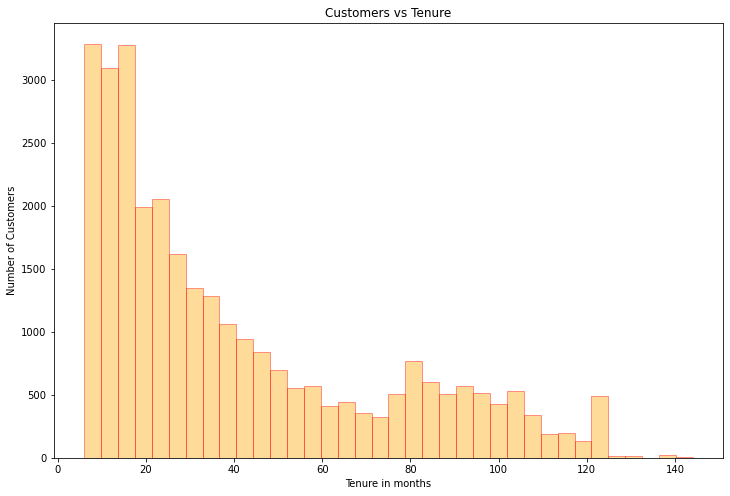

In [93]:
plt.figure(figsize=(12,8))
tenure_df['tenure'] = tenure_df['aon']/30
tenure_df['tenure'].head()
ax = sns.distplot(tenure_df['tenure'], hist=True, kde=False,
                bins=int(180/5), color='orange', hist_kws = {'edgecolor' : 'red'},
                kde_kws = {'linewidth' : 4})

ax.set_ylabel('Number of Customers')
ax.set_xlabel('Tenure in months')
ax.set_title('Customers vs Tenure')
plt.show()

In [94]:
t_range = [0, 6, 12, 24, 60, 61]
label= ['0-6 months', '6-12 months', '1-2 years', '2-5 years', '5 years and above']

In [95]:
tenure_df['tenure_range'] = pd.cut(tenure_df['tenure'], t_range, labels=label)

<AxesSubplot:xlabel='tenure_range', ylabel='count'>

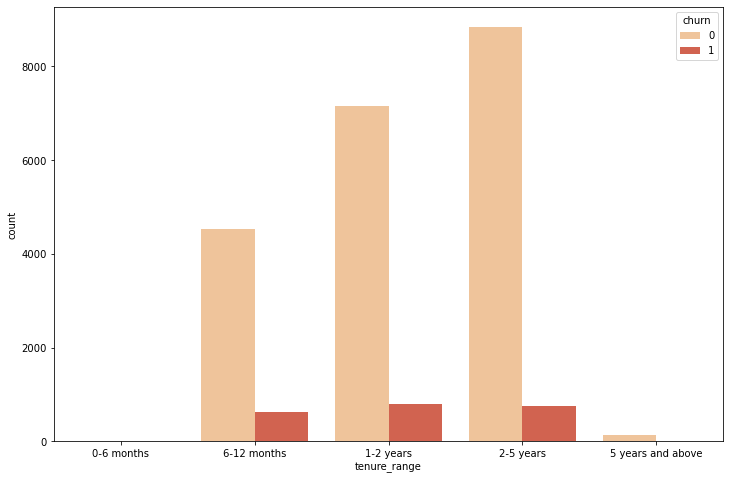

In [96]:
plt.figure(figsize = (12,8))
sns.countplot(x = 'tenure_range', hue='churn', data = tenure_df, palette='OrRd')

#### Important Inference 

1. It is clear that we have a very few number of high value customers who churn out which is a good indication.


2. However, the total number of new onboarded customers shows a decreasing trend and there are **no new customers for the last 6 months. This is a matter of concern**


3. There is no clear patter due to lack of data beyond last 5 years. Hence nothing much can be concluded. Hoever from the available data it is evident that there was **no churn at all beyond 5 years**.



In [97]:
telecom_ret['onnet_mou_diff'] = telecom_ret.onnet_mou_8 - ((telecom_ret.onnet_mou_6 + telecom_ret.onnet_mou_7)/2)
telecom_ret['offet_mou_diff'] = telecom_ret.offnet_mou_8 - ((telecom_ret.offnet_mou_6 + telecom_ret.offnet_mou_7)/2)
telecom_ret['arpu_diff'] = telecom_ret.arpu_8 - ((telecom_ret.arpu_6 + telecom_ret.arpu_7)/2)

#### These new difference variables will play a crucial role in our analysis and model as they highlight the customer behaviour between the good phase and action phase. 

In [98]:
telecom_ret.shape

(30001, 197)

### 4.3 Drop all month 9 data (churn phase)

In [99]:
## We will drop all variables belonging to the churn phase.. i.e month 9

#month_9_cols = telecom_ret.columns[telecom_ret.columns.str.contains('_9')]
#telecom_ret.drop(month_9_cols, axis=1, inplace=True)
#telecom_ret.shape

telecom_ret = telecom_ret.filter(regex='[^9]$', axis=1)
telecom_ret.shape

(30001, 150)

In [100]:
telecom_ret.drop('sep_vbc_3g', axis=1, inplace=True)

In [101]:
## update columns

month_9_col = telecom.filter(regex='9$', axis=1).columns

cat_columns = [col for col in cat_columns if col not in month_9_col]
cat_columns.append('churn')
num_columns = [col for col in telecom_ret.columns if col not in cat_columns]

In [102]:
#telecom_ret[num_columns] = telecom_ret[num_columns].apply(pd.to_numeric)
telecom_ret[cat_columns] = telecom_ret[cat_columns].apply(lambda column : column.astype("category"), axis=0)

In [103]:
(telecom_ret.isnull().sum() * 100 /len(telecom_ret)).sort_values(ascending=False)

arpu_6              0.0
total_rech_amt_7    0.0
max_rech_amt_6      0.0
max_rech_amt_7      0.0
max_rech_amt_8      0.0
                   ... 
og_others_8         0.0
total_og_mou_6      0.0
total_og_mou_7      0.0
total_og_mou_8      0.0
offet_mou_diff      0.0
Length: 149, dtype: float64

In [104]:
telecom_ret.shape

(30001, 149)

## 5. EDA

    Check for Imbalance in data
    Univariate analysis
    Bivariate analysis
    Multivariate analysis
    Correlation check

### 5.1 Check Data Imbalance

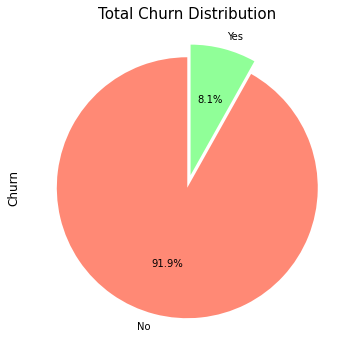

In [105]:
pie = telecom_ret['churn'].value_counts()*100 / len(telecom_ret)
ax = pie.plot.pie(labels = ['No', 'Yes'],autopct='%1.1f%%', colors = ['#ff8975', '#90ff98'], startangle=90, explode = (0, 0.1), figsize=(8,6))
ax.set_ylabel('Churn', fontsize = 12)
ax.set_title('Total Churn Distribution', fontsize = 15)
plt.show()

#### Clear imbalance in data. We will use SMOTE to fix this later.

    This suggests that we have around 92% of the customers that do not churn.

### 5.2 Univariate Analysis

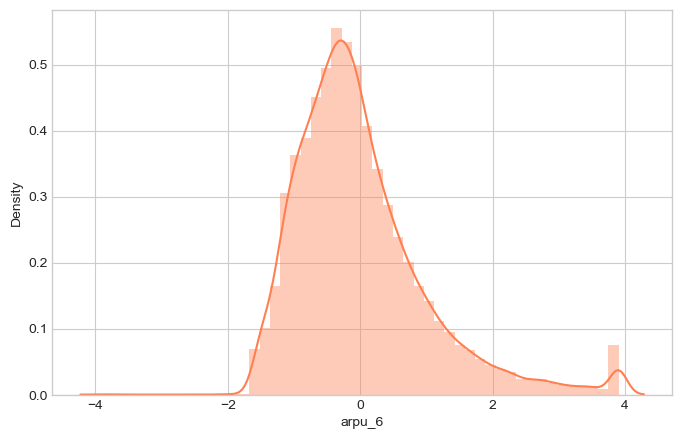

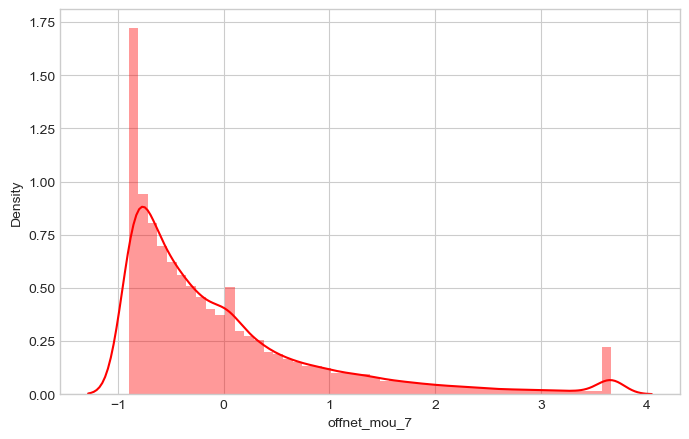

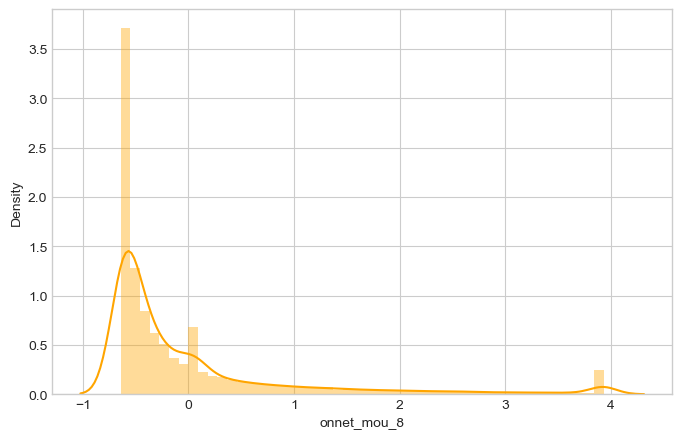

In [265]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize = (8,5))
sns.distplot(telecom_ret.arpu_6, color='coral')
plt.show()

plt.figure(figsize = (8,5))
sns.distplot(telecom_ret.offnet_mou_7, color='red')
plt.show()

plt.figure(figsize = (8,5))
sns.distplot(telecom_ret.onnet_mou_8, color='orange')
plt.show()


#### Observation

**arpu_6 follows a normal distribution** while offnet_mou_7 and onnet_mou_8 are **right skewed.**



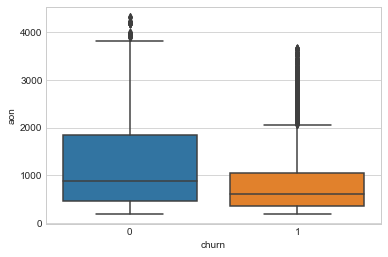

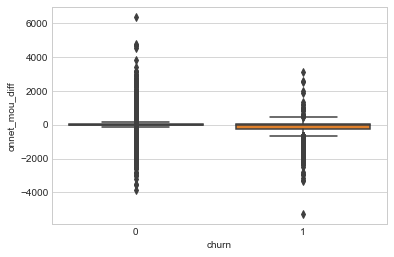

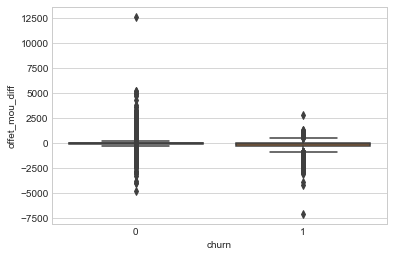

In [108]:
sns.boxplot (telecom_ret.churn, telecom_ret.aon)
plt.show()

sns.boxplot (telecom_ret.churn, telecom_ret.onnet_mou_diff)
plt.show()

sns.boxplot (telecom_ret.churn, telecom_ret.offet_mou_diff)
plt.show()

#### Outliers in incoming calls related columns

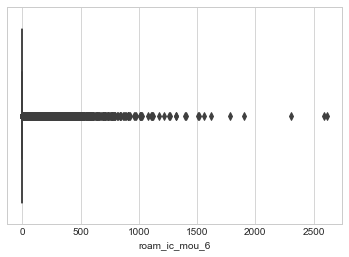

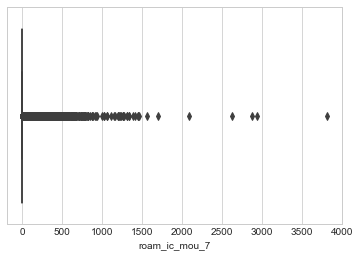

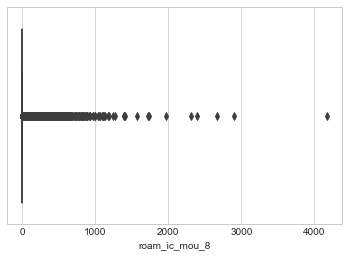

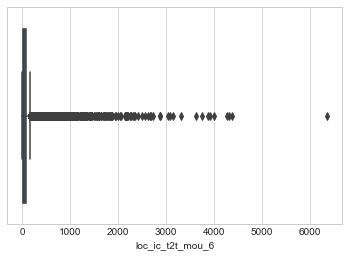

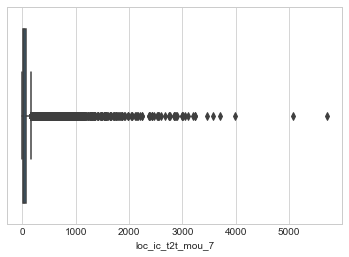

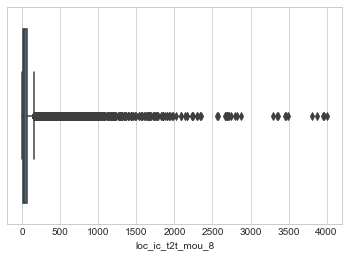

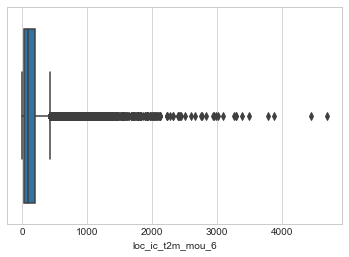

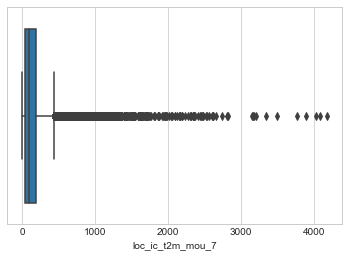

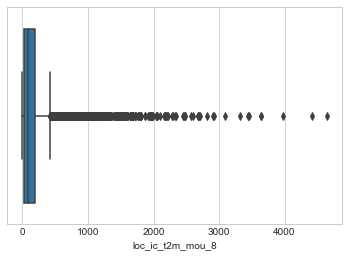

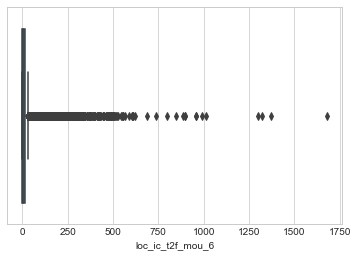

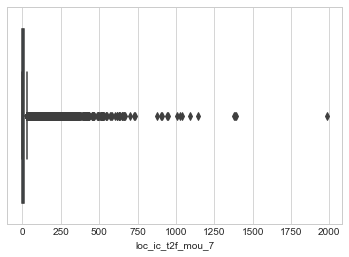

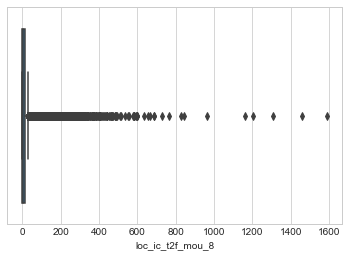

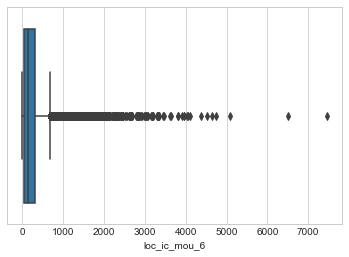

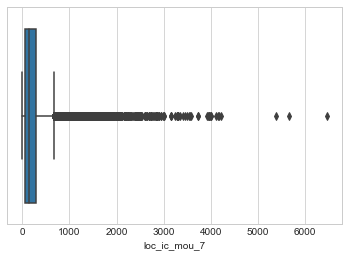

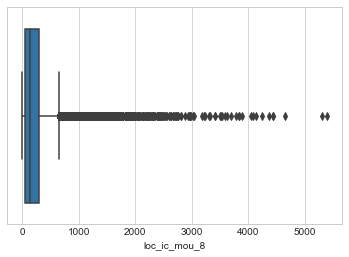

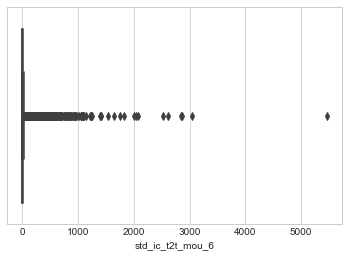

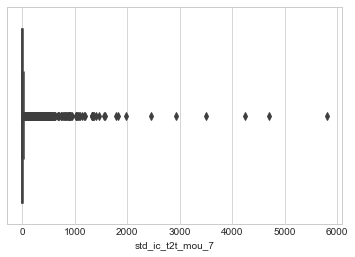

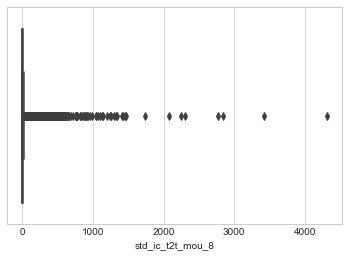

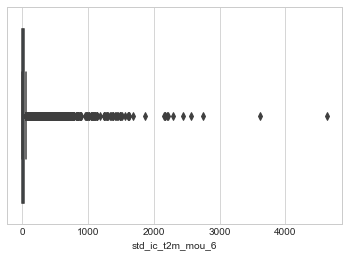

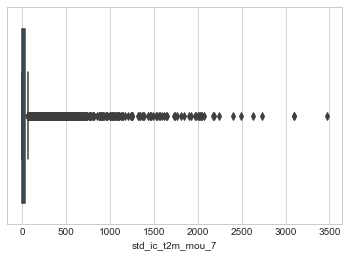

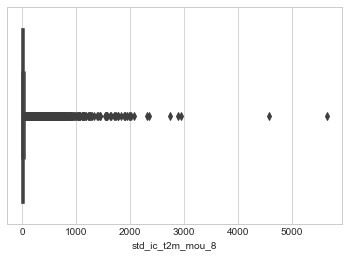

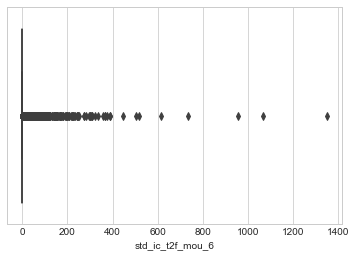

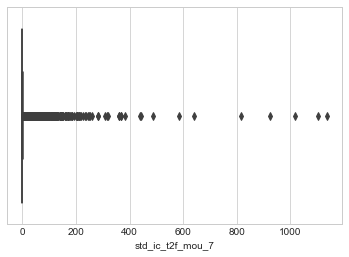

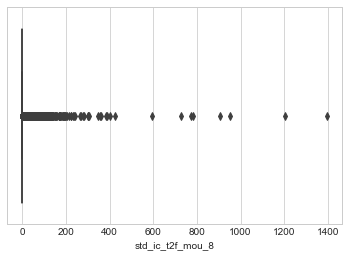

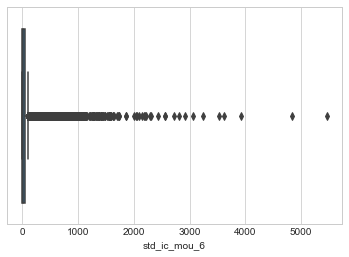

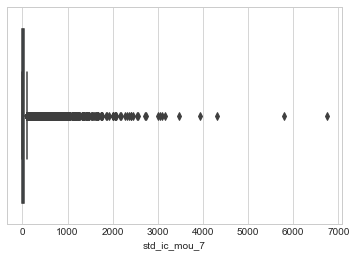

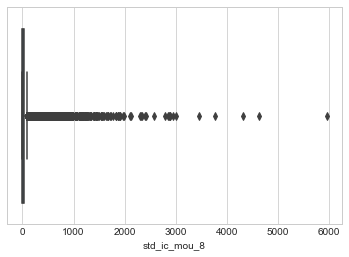

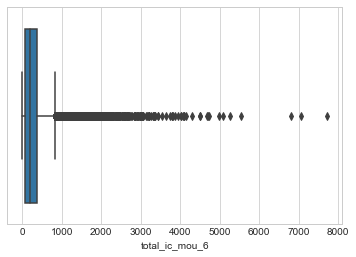

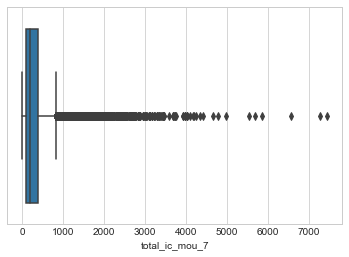

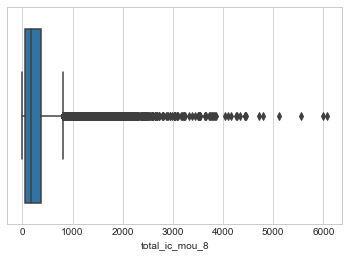

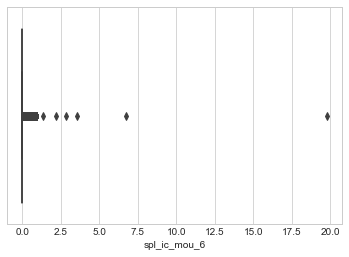

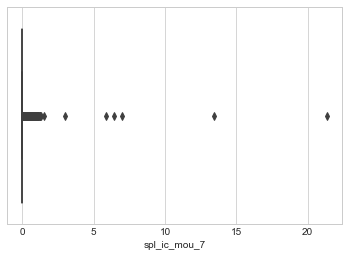

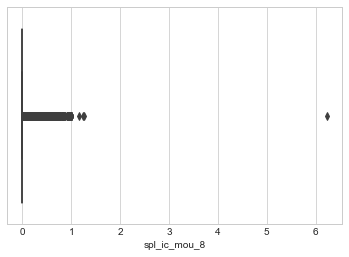

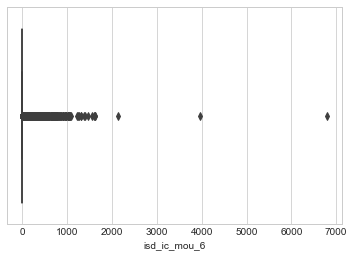

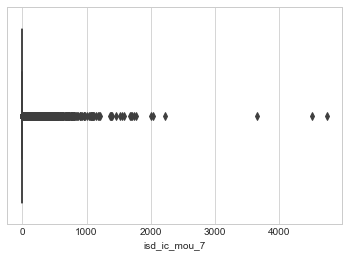

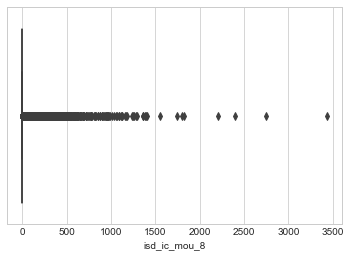

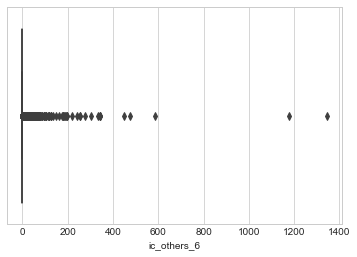

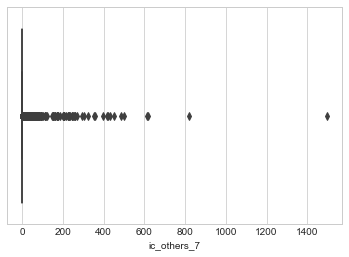

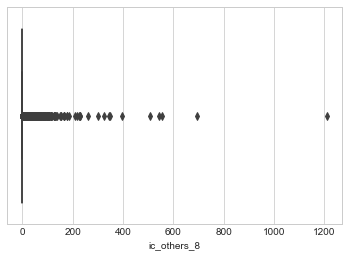

In [109]:
for item in telecom_ret.columns[telecom_ret.columns.str.contains('ic')]:
    sns.boxplot(telecom_ret[item])
    plt.xlabel(item)
    plt.show()

#### Almost all the columns visibly reflect the present of outliers

#### Outliers in outgoing calls related columns

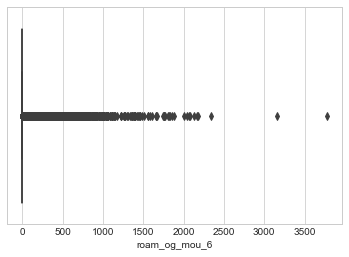

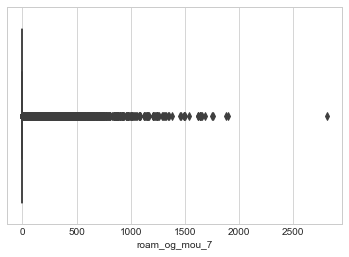

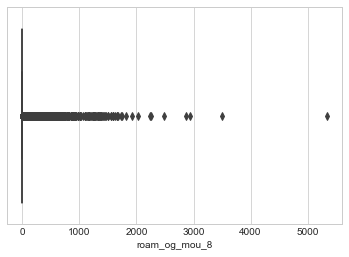

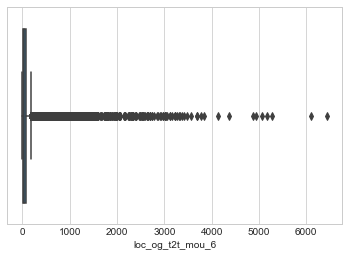

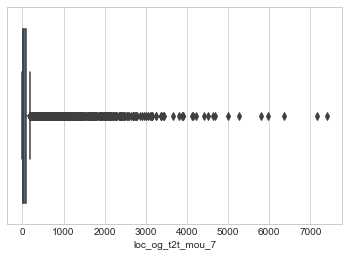

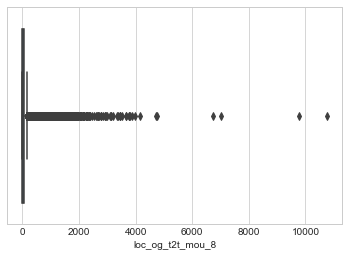

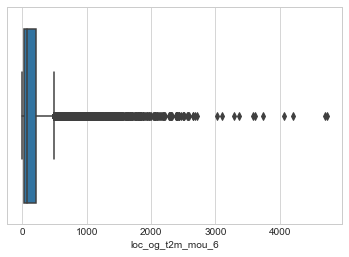

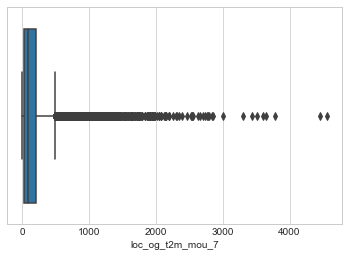

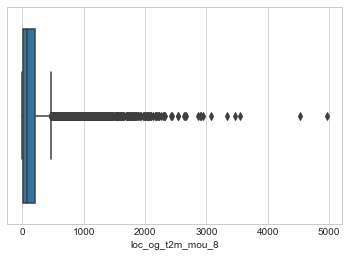

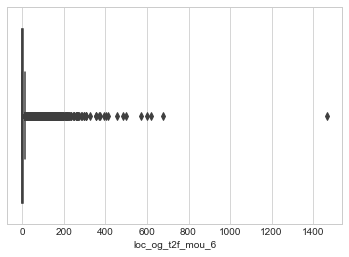

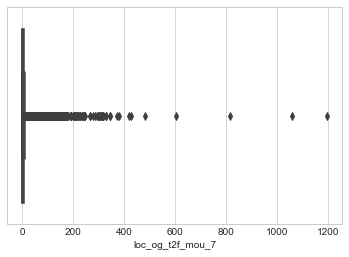

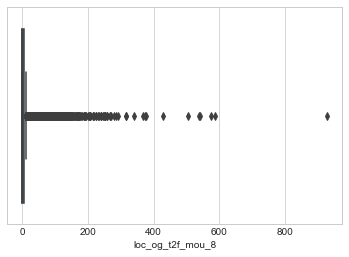

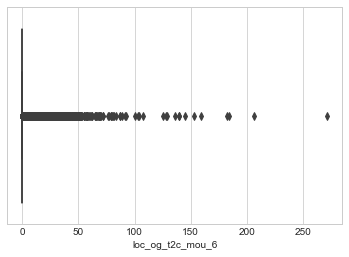

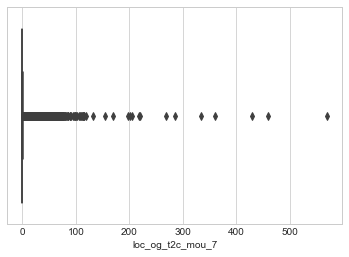

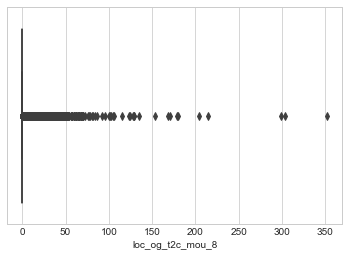

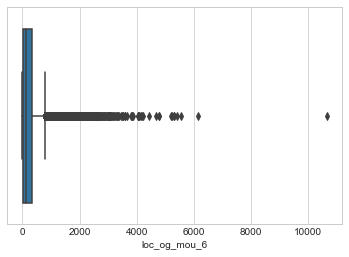

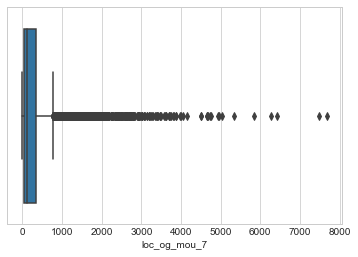

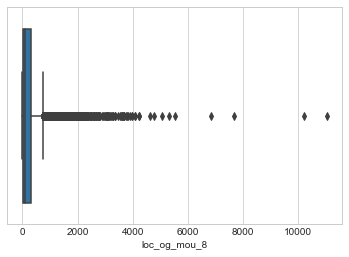

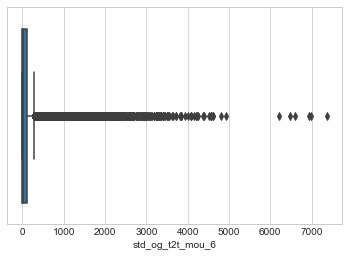

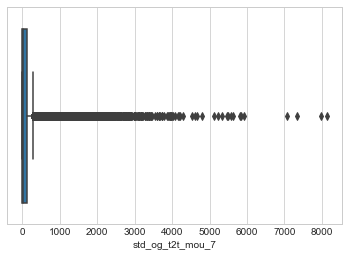

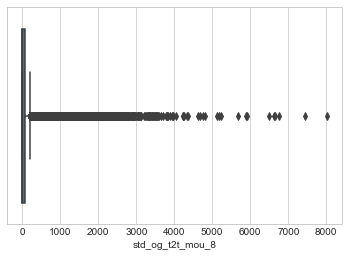

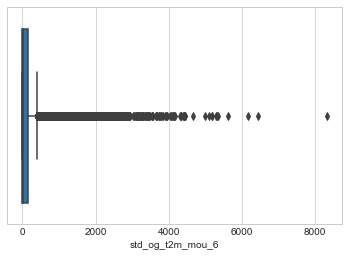

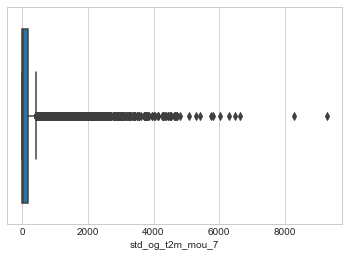

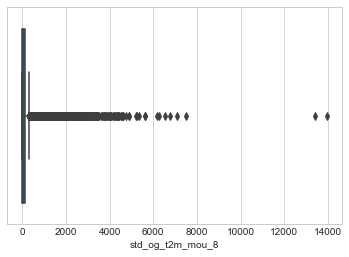

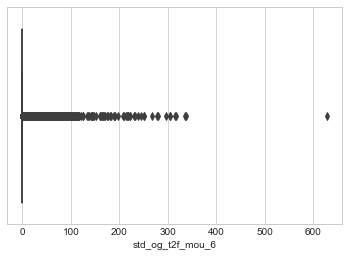

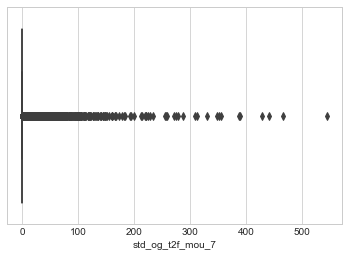

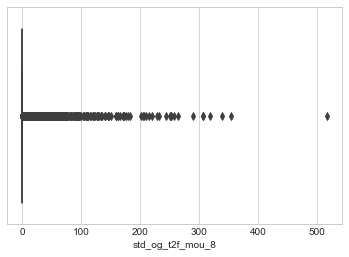

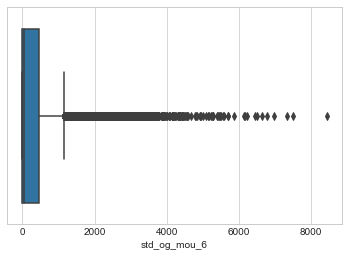

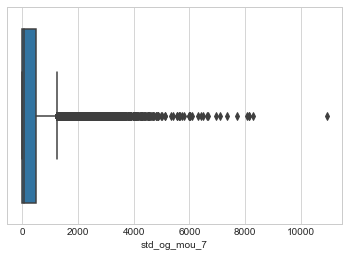

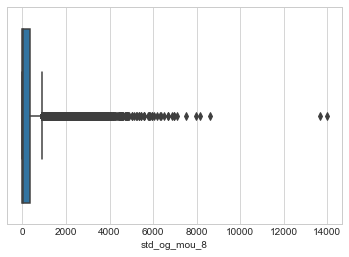

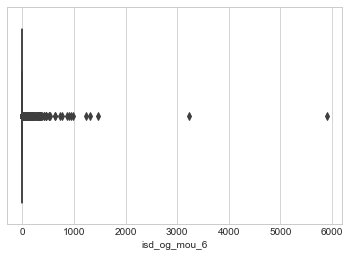

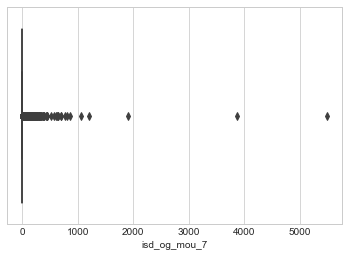

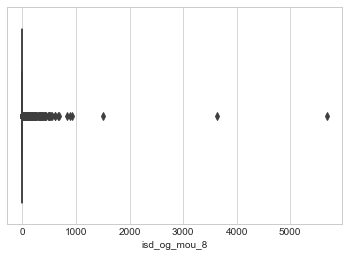

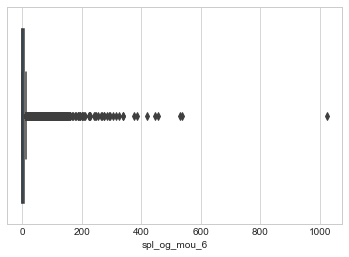

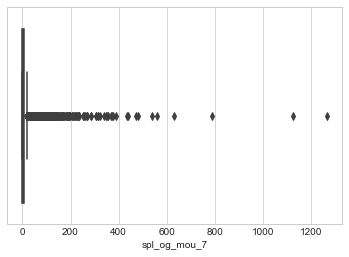

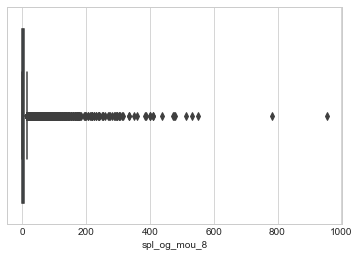

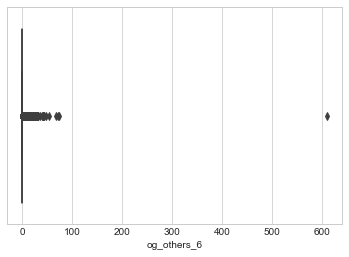

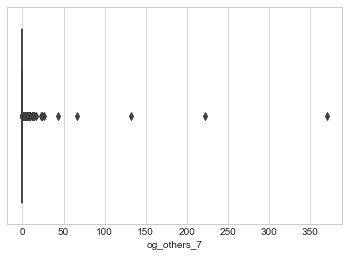

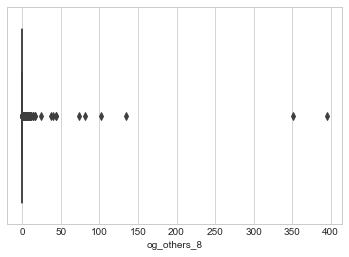

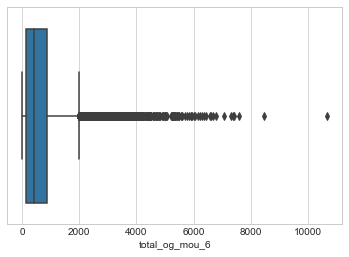

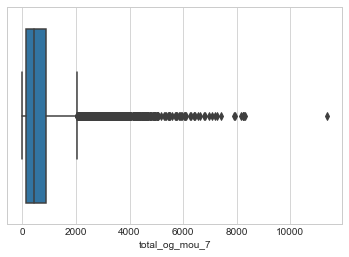

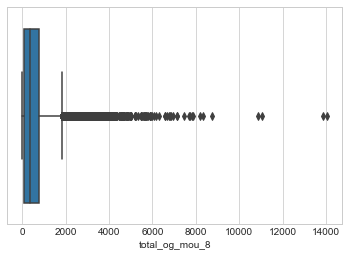

In [110]:
for item in telecom_ret.columns[telecom_ret.columns.str.contains('og')]:
    sns.boxplot(telecom_ret[item])
    plt.xlabel(item)
    plt.show()

### Inference : 

 > There is a visible presence of outliers. 

 > We will treat these ouliers for all the numeric columns using **k-sigma technique**

### 5.3 Bivariate Analysis

In [111]:
def plot_box(var):
    plt.style.use('default')
    plt.figure(figsize=(20,15))
    frame = telecom_ret
    plt.subplot(2,3,1)
    sns.boxplot(data=frame, y=var+'_6', x='churn', hue='churn', showfliers=False, palette='OrRd')
    
    plt.subplot(2,3,2)
    sns.boxplot(data=frame, y=var+'_7', x='churn', hue='churn', showfliers=False, palette='OrRd')
    
    plt.subplot(2,3,3)
    sns.boxplot(data=frame, y=var+'_8', x='churn', hue='churn', showfliers=False, palette='rainbow')
    
    plt.show()

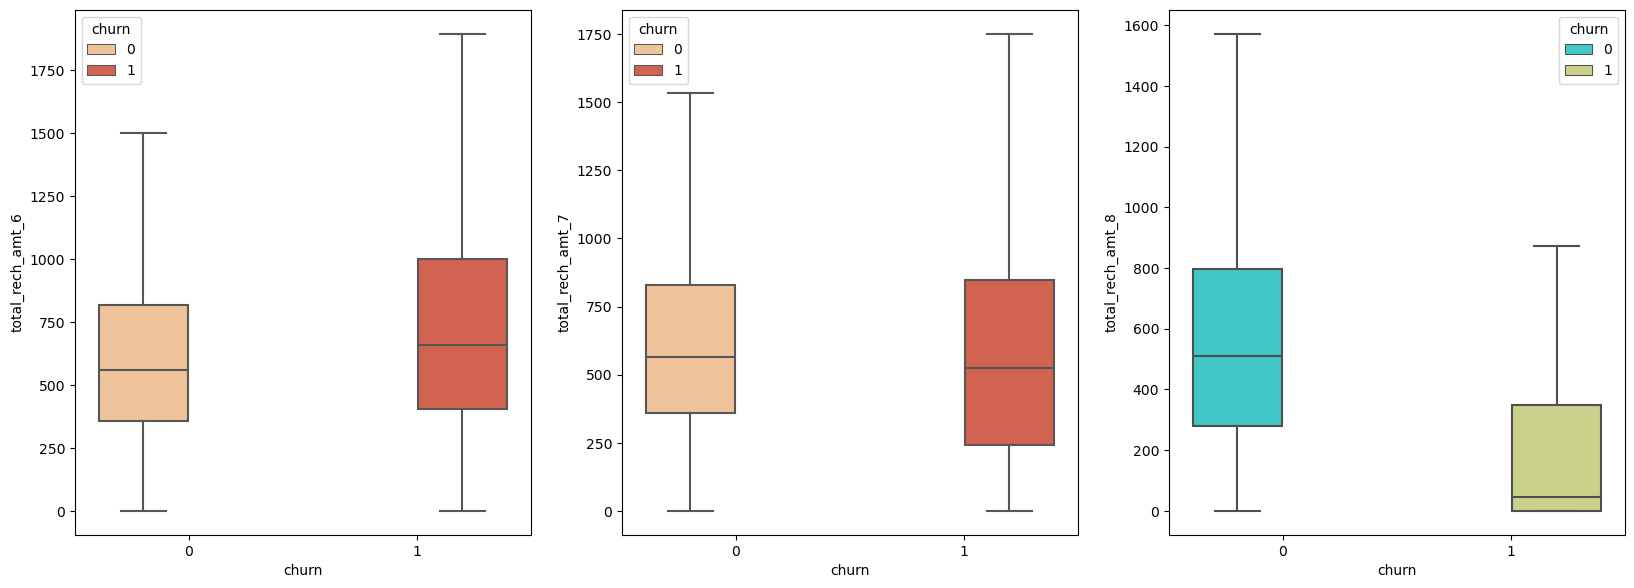

In [112]:
## View distribution of total recharge amount for months 6, 7 and 8

plot_box('total_rech_amt')

**Inference :**
    
    There is a huge drop in the total recharge amount for churned customers during action phase (8th month)

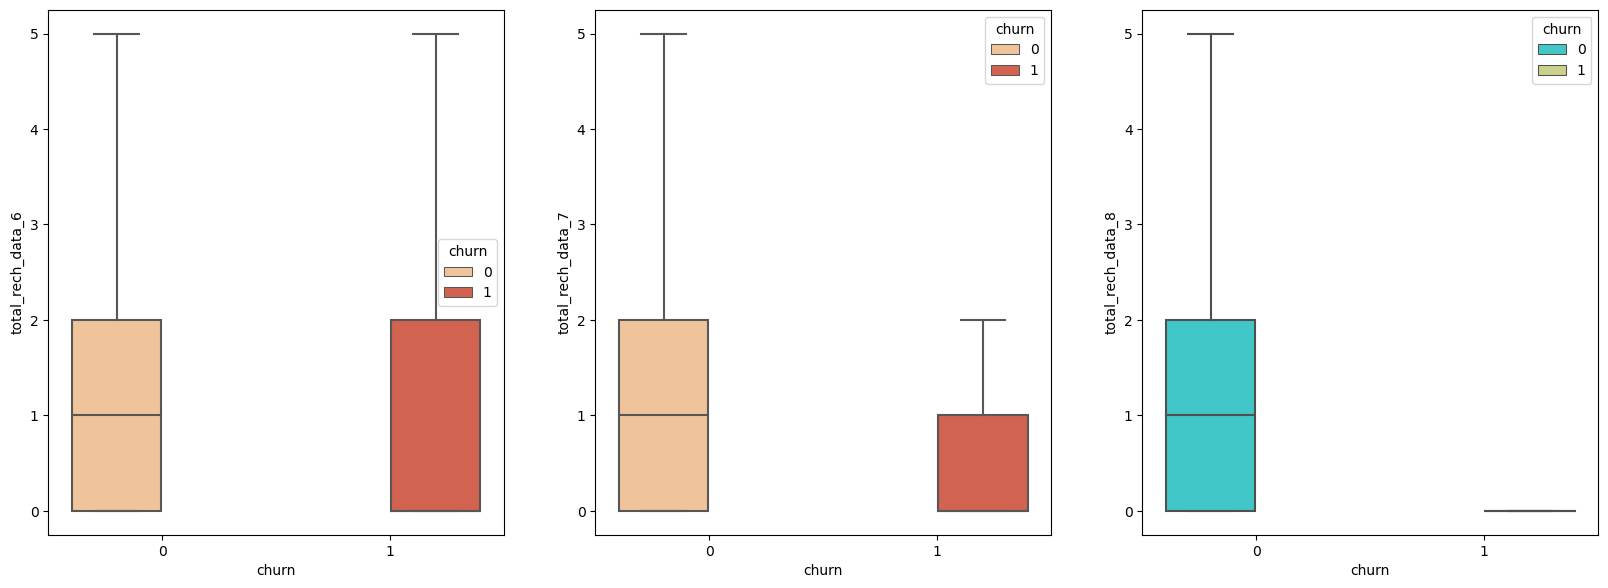

In [113]:
## View distribution of total data recharge amount for months 6, 7 and 8

plot_box('total_rech_data')

**Inference :**

There is a huge drop in the total data recharge amount for churned customers during action phase (8th month)

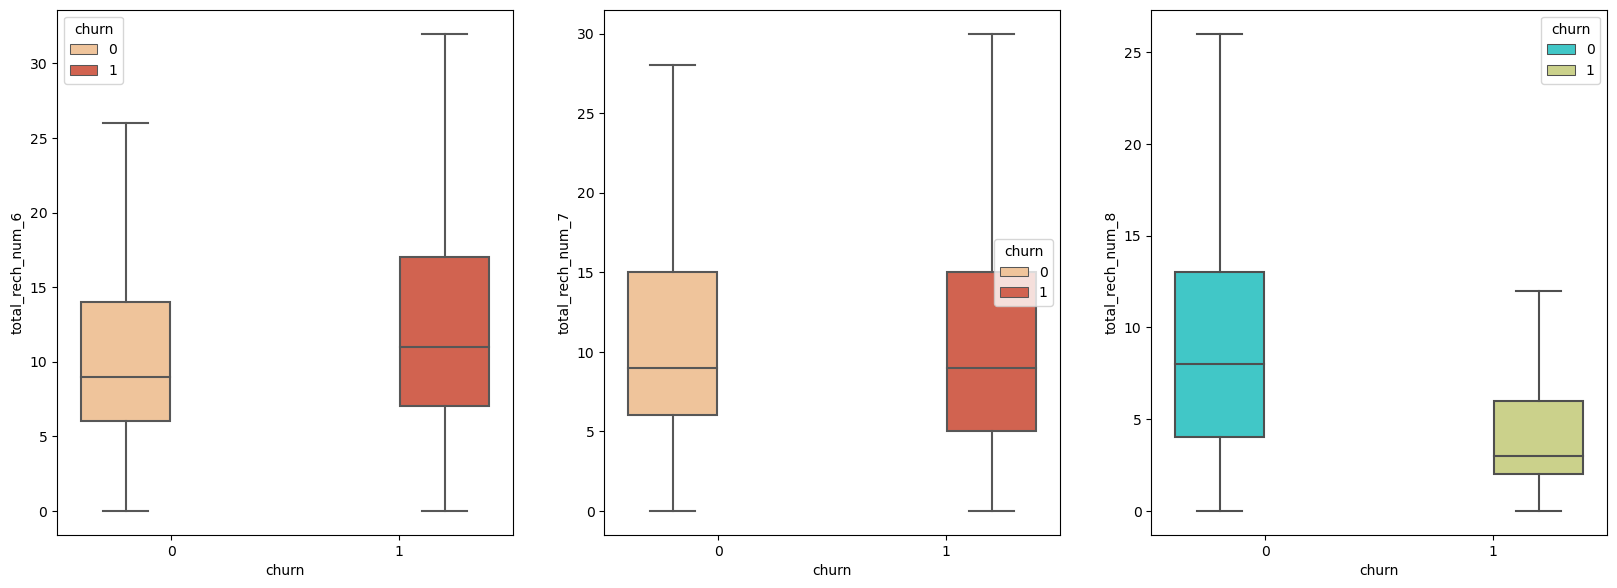

In [114]:
## View distribution of total number recharge amount for months 6, 7 and 8

plot_box('total_rech_num')

**Inference :**

There is a significant drop in total recharge amount for churned customers during action phase (8th month)

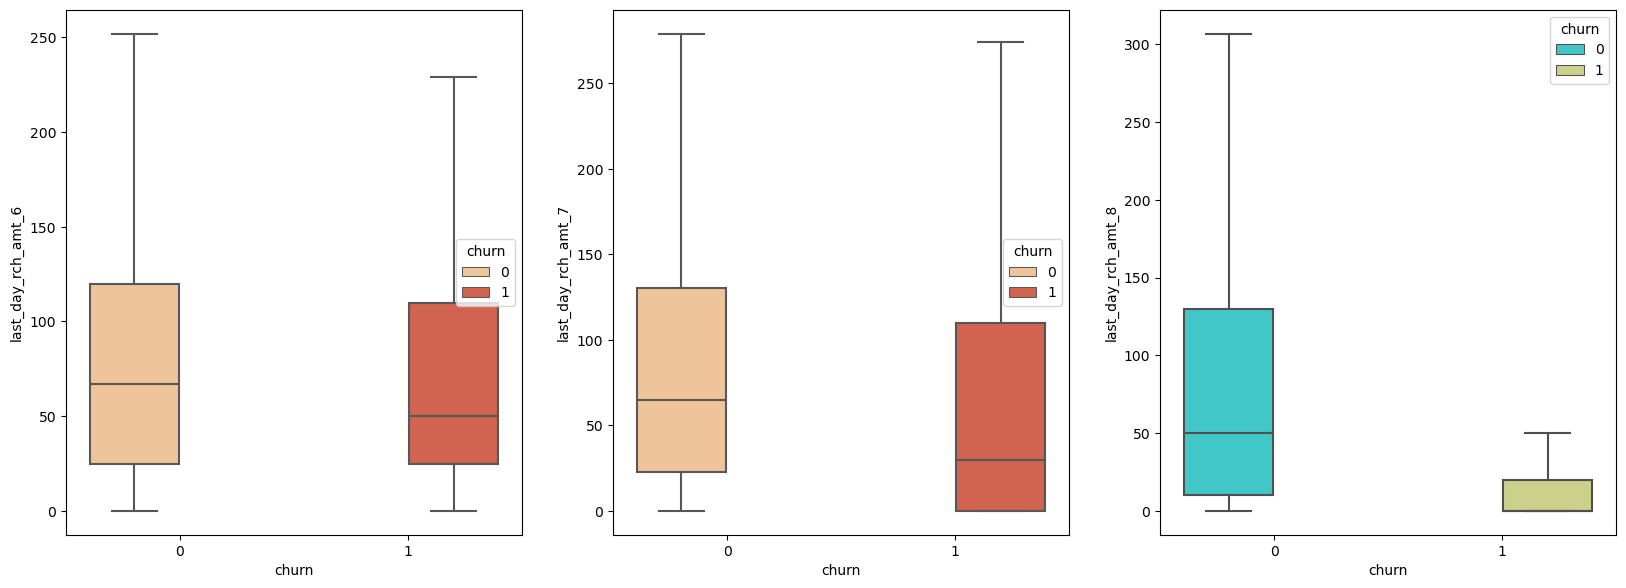

In [115]:
## View distribution of last day recharge amount for months 6, 7 and 8

plot_box('last_day_rch_amt')

**Inference :**

There is a huge drop in last day recharge amount for churned customers during action phase (8th month)

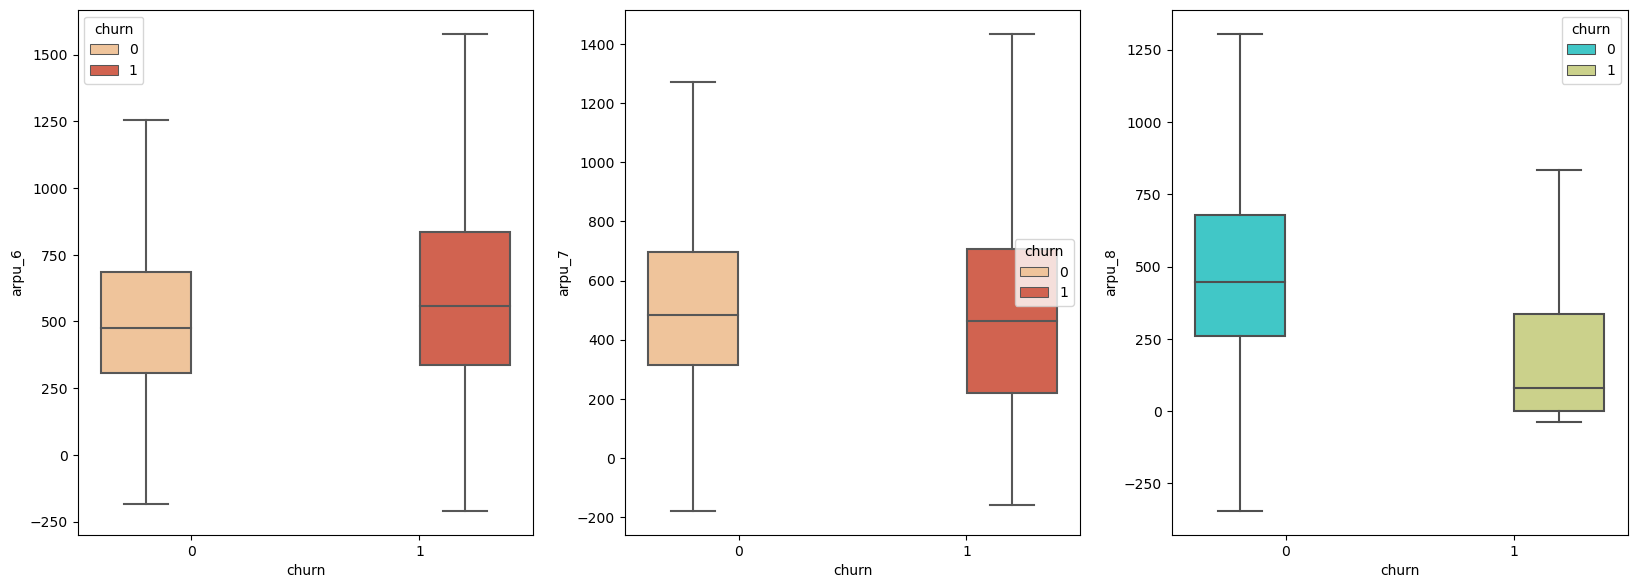

In [116]:
## View distribution of average revenue per user for months 6, 7 and 8

arpu_columns = telecom_ret.columns[telecom_ret.columns.str.contains('arpu_')]
plot_box('arpu')

#### All the above plots suggest that during August month, there has been a varying trend where there has been a significant drop in the recharge amounts as compared to June and July. 

Clearly, the action phase is crucial in retaining back the churing customers and the patterns suggest strong actions during August (or even before) can help improve this trend

### Plot mean distributions between churn and non-churn customers

In [117]:
def plot_mean_dist(df, cols):
    
    df0 = df[df.churn==0].filter(cols)
    df1 = df[df.churn==1].filter(cols)
    
    mean_df0 = pd.DataFrame([df0.mean()], index={'Non Churn'})
    mean_df1 = pd.DataFrame([df1.mean()], index={'Churn'})
    
    frame = [mean_df0, mean_df1]
    mean = pd.concat(frame)
    
    mean.T.plot.bar(figsize=(10,5), rot=0, color=['orange', 'indigo'])
    plt.show()
    
    return mean

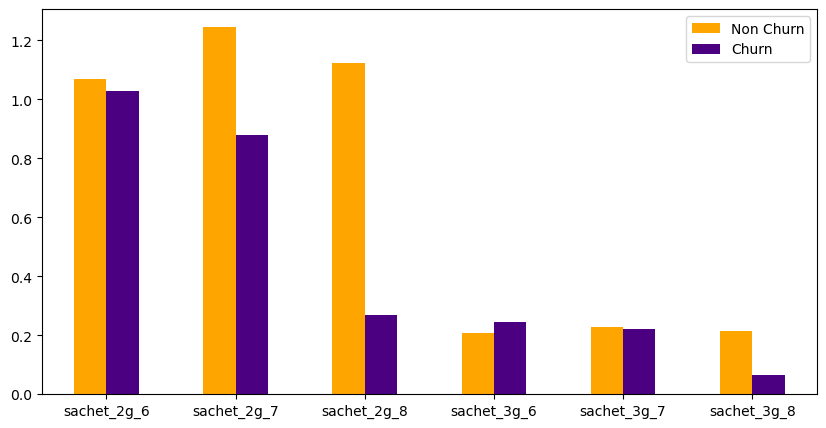

,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8
Non Churn,1.069303,1.243832,1.124383,0.206313,0.228048,0.214550
Churn,1.029496,0.877509,0.269971,0.244162,0.221221,0.065137


In [118]:
## check service schemes validity smaller than a month for 2G and 3G

Sachet_2g_3g = telecom_ret.columns[telecom_ret.columns.str.contains('sachet_2g|sachet_3g', regex=True)]
plot_mean_dist(telecom_ret, Sachet_2g_3g)

#### There is a clear drop in sachet services for churned customers in the month of August

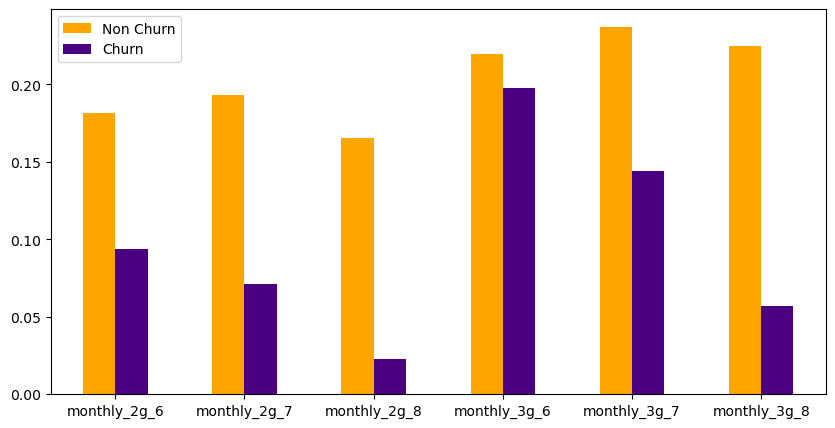

,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8
Non Churn,0.181676,0.193215,0.165203,0.219557,0.236575,0.224673
Churn,0.093404,0.070873,0.022941,0.197460,0.143794,0.056944


In [119]:
## check service schemes for 2G and 3G

schemes_2g_3g = telecom_ret.columns[telecom_ret.columns.str.contains('monthly_2g|monthly_3g', regex=True)]
schemes_2g_3g.tolist()
plot_mean_dist(telecom_ret, schemes_2g_3g)

#### Again there is a significant drop observed  for monthly subscription during the momnth of August

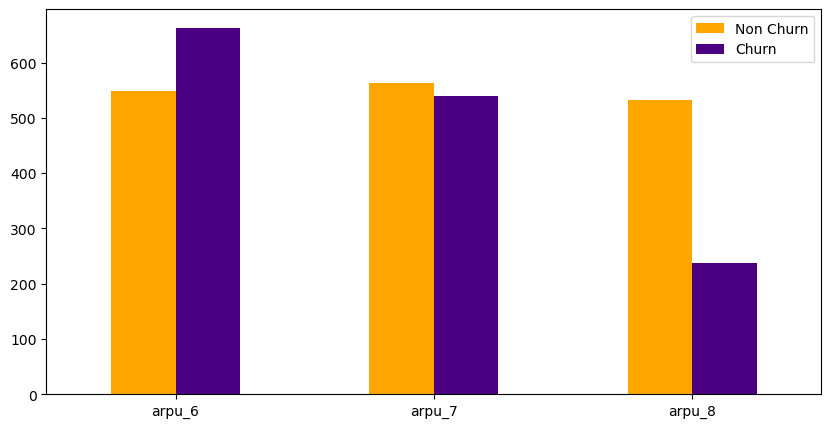

,arpu_6,arpu_7,arpu_8
Non Churn,549.220390,562.608191,532.635710
Churn,663.158246,540.165968,237.200793


In [120]:
## check service schemes validity smaller than a month for 2G and 3G

plot_mean_dist(telecom_ret, arpu_columns)

#### A significant drop in arpu value during August month

## 6. Feature Scaling and Preprocessing

    Outlier Treatment
    Imabalance treatment (SMOTE)
    Train-test split
    Standardize data
    PCA

### 6.1 Outlier Treatment

**Using k-sigma technique here**

Capping the data or drop the data that falls beyond three standard deviations (i.e  > 3Std  and   < -3Std) as per **1-2-3 Rule of normal distribution** (99.7% of data lies within three standard deviations)


In [121]:
def treat_outliers(arr, v=3):
    u_limit = arr.mean() + v*arr.std()
    l_limit = arr.mean() - v*arr.std()
    
    arr[arr < l_limit] = l_limit
    arr[arr > u_limit] = u_limit
    return arr

In [122]:
## example of capping
sample_arr = list(range(100))

#add outliers to the data
sample_arr[0]  = -9999
sample_arr[99] =  9999

#cap outliers
sample_arr = np.array(sample_arr)
print('Array after capping all the outliers : \n', treat_outliers(sample_arr, v=2))

Array after capping all the outliers : 
 [-2780     1     2     3     4     5     6     7     8     9    10    11
    12    13    14    15    16    17    18    19    20    21    22    23
    24    25    26    27    28    29    30    31    32    33    34    35
    36    37    38    39    40    41    42    43    44    45    46    47
    48    49    50    51    52    53    54    55    56    57    58    59
    60    61    62    63    64    65    66    67    68    69    70    71
    72    73    74    75    76    77    78    79    80    81    82    83
    84    85    86    87    88    89    90    91    92    93    94    95
    96    97    98  2877]


In [123]:
telecom_ret[num_columns] = telecom_ret[num_columns].apply(pd.to_numeric, errors='coerce')

In [124]:
telecom_ret[num_columns].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 30000
Columns: 142 entries, arpu_6 to offet_mou_diff
dtypes: float64(117), int64(25)
memory usage: 33.7 MB


In [125]:
telecom_ret[num_columns] = telecom_ret[num_columns].apply(treat_outliers, axis=0)

### 6.2 Train-test split

In [126]:
scaler = StandardScaler()
telecom_ret[num_columns] = scaler.fit_transform(telecom_ret[num_columns])

In [127]:
# convert all columns to numeric datatypes (int or float as suitable)
telecom_ret['churn'] = pd.to_numeric(telecom_ret['churn'])

In [128]:
# divide train and test data

X = telecom_ret.drop('churn', axis=1)
y = telecom_ret.churn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42, stratify = y)

In [129]:
# print shapes of train and test sets

X_train.shape

(22500, 148)

In [130]:
y_train.shape


(22500,)

In [131]:
X_test.shape


(7501, 148)

In [132]:
y_test.shape

(7501,)

#### Group categorical variables by their mean values

In [133]:
train = pd.concat([X_train, y_train], axis=1)

In [134]:
# group all train categorical columns by their respective means

print(train.groupby('night_pck_user_6').churn.mean() ,'\n')
print(train.groupby('night_pck_user_7').churn.mean(),'\n')
print(train.groupby('night_pck_user_8').churn.mean(),'\n')
print(train.groupby('fb_user_6').churn.mean(),'\n')
print(train.groupby('fb_user_7').churn.mean(),'\n')
print(train.groupby('fb_user_8').churn.mean(),'\n')

night_pck_user_6
-1.0    0.099076
0.0     0.066732
1.0     0.091803
Name: churn, dtype: float64 

night_pck_user_7
-1.0    0.115736
0.0     0.055173
1.0     0.056537
Name: churn, dtype: float64 

night_pck_user_8
-1.0    0.140689
0.0     0.029228
1.0     0.023256
Name: churn, dtype: float64 

fb_user_6
-1.0    0.099076
0.0     0.067021
1.0     0.067367
Name: churn, dtype: float64 

fb_user_7
-1.0    0.115736
0.0     0.060277
1.0     0.054767
Name: churn, dtype: float64 

fb_user_8
-1.0    0.140689
0.0     0.068471
1.0     0.024479
Name: churn, dtype: float64 



In [135]:
# map the train and test categorical values with the above mean values

map = {'night_pck_user_6'  : {-1 : 0.099165, 0: 0.066797, 1: 0.087838},
       'night_pck_user_7'  : {-1 : 0.115746, 0: 0.055494, 1: 0.051282},
        'night_pck_user_8' : {-1 : 0.141108, 0: 0.029023, 1: 0.016194},
        'fb_user_6'        : {-1 : 0.099165, 0: 0.069460, 1: 0.067124},
        'fb_user_7'        : {-1 : 0.115746, 0: 0.059305, 1: 0.055082},
        'fb_user_8'        : {-1 : 0.141108, 0: 0.066887, 1: 0.024463},    
      
      }

X_train.replace(map, inplace=True)
X_test.replace(map, inplace=True)

In [136]:
# recheck datatypes of categorical columns

X_train[[cols for cols in cat_columns if cols not in ['churn']]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22500 entries, 1003 to 2379
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   night_pck_user_6  22500 non-null  float64
 1   night_pck_user_7  22500 non-null  float64
 2   night_pck_user_8  22500 non-null  float64
 3   fb_user_6         22500 non-null  float64
 4   fb_user_7         22500 non-null  float64
 5   fb_user_8         22500 non-null  float64
dtypes: float64(6)
memory usage: 1.2 MB


#### All datatypes have been checked and are accurate now for categorical variable

### 6.2 SMOTE

#### FIX INBALANCE IN DATA

We had seen earlier that our churn i.e target column is highly imbalanced.

    Now we will use SMOTE : Synthetic Minority Oversampling Technique to fix this

**SMOTE creates synthetic samples for minority class through upsampling**

In [137]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

In [138]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)

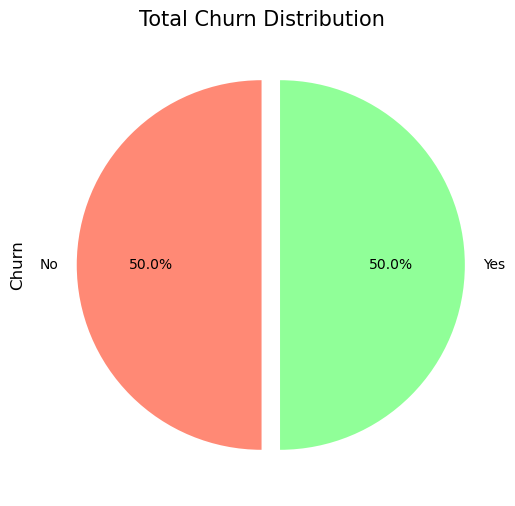

In [139]:
pie = y_train.value_counts()*100 / len(y_train)
ax = pie.plot.pie(labels = ['No', 'Yes'],autopct='%1.1f%%', colors = ['#ff8975', '#90ff98'], startangle=90, explode = (0, 0.1), figsize=(8,6))
ax.set_ylabel('Churn', fontsize = 12)
ax.set_title('Total Churn Distribution', fontsize = 15)
plt.show()

### We have a Balanced dataset now

In [140]:
print('X_train shape after SMOTE : ', X_train.shape)
print('y_train shape after SMOTE : ', y_train.shape)

X_train shape after SMOTE :  (41338, 148)
y_train shape after SMOTE :  (41338,)


In [141]:
(X_train.isnull().sum() * 100 /len(X_train)).sort_values(ascending=False)

arpu_6              0.0
total_rech_amt_6    0.0
total_rech_amt_8    0.0
max_rech_amt_6      0.0
max_rech_amt_7      0.0
                   ... 
og_others_7         0.0
og_others_8         0.0
total_og_mou_6      0.0
total_og_mou_7      0.0
offet_mou_diff      0.0
Length: 148, dtype: float64

# 7. Model Building 


### 7.1 Interpretable Models (without PCA)
    1. RFE
    
    2. Logistic Regression Model (general)
    
    3. Logistic Regression Model (rfe-selected features)


### 7.2 High Performance Models (with PCA)


    1. PCA
    
    2. Logistic Regression
    
    3. Random Forest
    
    4. SVM
    
    5. XGBoost

### 7.1.1 Recursive Feature Elimination

We have a very high number of features here and hence it is crucial to perform Feature Elimination¶

**We will use both manual and auto coarse tuning for this :**

    Recursive Feature Elimination

    Manual elimination based on p-val and VIF

In [142]:
##performing RFE with 20 variables

#instantiate Logistic regression function
model = LogisticRegression()

#instantiate RFE with 20 features
rfe = RFE(model, 20)

In [143]:
#fit RFE model on the train set

rfe = rfe.fit(X_train, y_train)

In [144]:
# Extract all columns with their rfe rankings and support

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('arpu_6', False, 50),
 ('arpu_7', False, 28),
 ('arpu_8', False, 13),
 ('onnet_mou_6', False, 24),
 ('onnet_mou_7', False, 58),
 ('onnet_mou_8', True, 1),
 ('offnet_mou_6', False, 25),
 ('offnet_mou_7', False, 23),
 ('offnet_mou_8', True, 1),
 ('roam_ic_mou_6', False, 124),
 ('roam_ic_mou_7', False, 52),
 ('roam_ic_mou_8', False, 51),
 ('roam_og_mou_6', False, 53),
 ('roam_og_mou_7', False, 79),
 ('roam_og_mou_8', False, 112),
 ('loc_og_t2t_mou_6', False, 73),
 ('loc_og_t2t_mou_7', False, 9),
 ('loc_og_t2t_mou_8', False, 7),
 ('loc_og_t2m_mou_6', False, 72),
 ('loc_og_t2m_mou_7', False, 71),
 ('loc_og_t2m_mou_8', False, 35),
 ('loc_og_t2f_mou_6', False, 77),
 ('loc_og_t2f_mou_7', False, 36),
 ('loc_og_t2f_mou_8', False, 76),
 ('loc_og_t2c_mou_6', False, 45),
 ('loc_og_t2c_mou_7', False, 97),
 ('loc_og_t2c_mou_8', False, 55),
 ('loc_og_mou_6', False, 119),
 ('loc_og_mou_7', False, 8),
 ('loc_og_mou_8', True, 1),
 ('std_og_t2t_mou_6', False, 118),
 ('std_og_t2t_mou_7', False, 67),
 ('s

In [145]:
# print the rfe selected columns (20)

rfe_cols = X_train.columns[rfe.support_]
print(rfe_cols)

Index(['onnet_mou_8', 'offnet_mou_8', 'loc_og_mou_8', 'std_og_t2t_mou_8',
       'std_og_t2m_mou_8', 'std_og_mou_8', 'total_og_mou_7', 'total_og_mou_8',
       'loc_ic_t2m_mou_6', 'loc_ic_mou_6', 'loc_ic_mou_8', 'spl_ic_mou_8',
       'last_day_rch_amt_8', 'total_rech_data_7', 'total_rech_data_8',
       'count_rech_2g_7', 'night_pck_user_7', 'sachet_2g_7', 'fb_user_7',
       'fb_user_8'],
      dtype='object')


### 7.1.2 Logistic Regression

In [146]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [147]:
## check predictions on train data

y_pred_train = lr.predict(X_train)

#confusion matrix
cm = confusion_matrix(y_train, y_pred_train)
print('confusion matrix \t\n', cm)

print("Accuracy is \t", metrics.accuracy_score(y_train, y_pred_train).round(2))
print("Sensitivity is \t", (cm[1,1]/(cm[1,0]+cm[1,1])).round(2))
print("Specificity is \t", (cm[0,0]/(cm[0,0]+cm[0,1])).round(2))

y_pred_proba_train =  lr.predict_proba(X_train)[:, 1]
print('Area under the curve (AUC) is \t', round(roc_auc_score(y_train, y_pred_proba_train), 2))

confusion matrix 	
 [[17626  3043]
 [ 2756 17913]]
Accuracy is 	 0.86
Sensitivity is 	 0.87
Specificity is 	 0.85
Area under the curve (AUC) is 	 0.93


In [148]:
y_pred = lr.predict(X_test)

#confusion matrix
cm = confusion_matrix(y_test, y_pred)
print('confusion matrix \t\n', cm)

confusion matrix 	
 [[5899  992]
 [ 117  493]]


In [149]:
print("Accuracy is \t", metrics.accuracy_score(y_test, y_pred).round(2))
print("Sensitivity is \t", (cm[1,1]/(cm[1,0]+cm[1,1])).round(2))
print("Specificity is \t", (cm[0,0]/(cm[0,0]+cm[0,1])).round(2))
print('Area under the curve (AUC) is \t', round(roc_auc_score(y_test, y_pred), 2))

Accuracy is 	 0.85
Sensitivity is 	 0.81
Specificity is 	 0.86
Area under the curve (AUC) is 	 0.83


#### This model gives us a fair enough sensitivity, accuracy and specificity on both train and test data.



#### Model Summary (Logistic Regression without PCA)

**Train Set**

Accuracy is  0.86

Sensitivity is  0.87

Specificity is 0.86

Area under the curve (AUC) is  0.93


**Test Set**

Accuracy is  0.85

Sensitivity is 	 0.80

Specificity is 	 0.86

Area under the curve (AUC) is 0.83


#### As we can see, the above model has a great accuracy, specificity and AUC-ROC score. But poor sensitivity/recall.

    Since we aimed for an interpretable model here, we will use it only for interpretation purpose.
    
    We will use it to get the right recommendation for telecom company

### Using statsmodel to extract the top features

In [151]:
import statsmodels.api as sm

In [152]:
log_reg_model = sm.GLM(y_train,(sm.add_constant(X_train)), family=sm.families.Binomial())

In [153]:
log_reg_model = log_reg_model.fit().summary()

In [154]:
log_reg_model

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                41338
Model:                            GLM   Df Residuals:                    41189
Model Family:                Binomial   Df Model:                          148
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13905.
Date:                Wed, 03 Nov 2021   Deviance:                       27811.
Time:                        15:50:20   Pearson chi2:                 1.24e+05
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -3.2000      0.214    -14.963      0.000      -3.619      -2.781
arpu_6                  0.1262      0.060      2.119      0.034       0.009       0.243
arpu_7                  0.2734      0.062      4.444      0.000       0.153       0.394
arpu_8                  0.4634      0.071      6.546      0.000       0.325       0.602
onnet_mou_6             0.3747      0.113      3.324      0.001       0.154       0.596
onnet_mou_7            -0.2672      0.130     -2.051      0.040      -0.523      -0.012
onnet_mou_8             2.0756      0.145     14.313      0.000       1.791       2.360
offnet_mou_6            0.4425      0.098      4.502      0.000       0.250       0.635
offnet_mou_7            0.2920      0.112      2.603      0.009       0.072       0.512
offnet_mou_8            0.9944      0.127      7.853      0.000       0.746       1.243
roam_ic_mou_6          -0.0261      0.033     -0.798      0.425      -0.090       0.038
roam_ic_mou_7           0.2252      0.032      7.115      0.000       0.163       0.287
roam_ic_mou_8          -0.1275      0.028     -4.546      0.000      -0.183      -0.073
roam_og_mou_6          -0.0986      0.034     -2.926      0.003      -0.165      -0.033
roam_og_mou_7          -0.0895      0.032     -2.825      0.005      -0.152      -0.027
roam_og_mou_8          -0.0443      0.029     -1.513      0.130      -0.102       0.013
loc_og_t2t_mou_6       -0.1097      0.103     -1.067      0.286      -0.311       0.092
loc_og_t2t_mou_7        0.6298      0.121      5.195      0.000       0.392       0.867
loc_og_t2t_mou_8       -0.8753      0.136     -6.428      0.000      -1.142      -0.608
loc_og_t2m_mou_6       -0.1602      0.141     -1.137      0.255      -0.436       0.116
loc_og_t2m_mou_7        0.3779      0.166      2.276      0.023       0.052       0.703
loc_og_t2m_mou_8       -0.4804      0.182     -2.641      0.008      -0.837      -0.124
loc_og_t2f_mou_6       -0.1021      0.038     -2.683      0.007      -0.177      -0.028
loc_og_t2f_mou_7       -0.1525      0.043     -3.544      0.000      -0.237      -0.068
loc_og_t2f_mou_8        0.0897      0.041      2.206      0.027       0.010       0.169
loc_og_t2c_mou_6       -0.1052      0.023     -4.671      0.000      -0.149      -0.061
loc_og_t2c_mou_7       -0.0759      0.023     -3.234      0.001      -0.122      -0.030
loc_og_t2c_mou_8        0.1419      0.025      5.761      0.000       0.094       0.190
loc_og_mou_6            0.0727      0.228      0.318      0.750      -0.375       0.520
loc_og_mou_7           -0.9371      0.268     -3.500      0.000      -1.462      -0.412
loc_og_mou_8            0.0141      0.282      0.050      0.960      -0.539       0.567
std_og_t2t_mou_6       -0.0166      0.108     -0.154      0.877      -0.227       0.194
std

### As we have a very high number of features here and hence it is crucial to perform Feature Elimination 

**We will use both manual and auto coarse tuning for this :**
        
        We will now build the Logistic Regression Model on RFE selected features.
        
        Then we will evaluate it and further eliminate features manually based on p-val and VIF

In [155]:
X_train_sm1 = sm.add_constant(X_train[rfe_cols])
log_rfe_1 = sm.GLM(y_train, X_train_sm1, family=sm.families.Binomial())

#fit the model
log_rfe_1 = log_rfe_1.fit()
log_rfe_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                41338
Model:                            GLM   Df Residuals:                    41317
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15369.
Date:                Wed, 03 Nov 2021   Deviance:                       30738.
Time:                        15:50:21   Pearson chi2:                 8.11e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -2.7840      0.067    -41.330      0.000      -2.916      -2.652
onnet_mou_8            1.6380      0.060     27.169      0.000       1.520       1.756
offnet_mou_8           1.3397      0.052     25.729      0.000       1.238       1.442
loc_og_mou_8          -1.2595      0.094    -13.419      0.000      -1.444      -1.076
std_og_t2t_mou_8      -1.6695      0.079    -21.027      0.000      -1.825      -1.514
std_og_t2m_mou_8      -1.3165      0.071    -18.597      0.000      -1.455      -1.178
std_og_mou_8           1.0850      0.194      5.605      0.000       0.706       1.464
total_og_mou_7         0.5691      0.024     23.722      0.000       0.522       0.616
total_og_mou_8        -1.6160      0.170     -9.521      0.000      -1.949      -1.283
loc_ic_t2m_mou_6       0.1864      0.053      3.539      0.000       0.083       0.290
loc_ic_mou_6           0.2682      0.057      4.720      0.000       0.157       0.380
loc_ic_mou_8          -1.3217      0.050    -26.446      0.000      -1.420      -1.224
spl_ic_mou_8          -0.5747      0.031    -18.573      0.000      -0.635      -0.514
last_day_rch_amt_8    -0.5477      0.020    -27.546      0.000      -0.587      -0.509
total_rech_data_7      0.6333      0.046     13.824      0.000       0.544       0.723
total_rech_data_8     -0.6792      0.034    -20.093      0.000      -0.745      -0.613
count_rech_2g_7       -1.2375      0.114    -10.864      0.000      -1.461      -1.014
night_pck_user_7      39.4024     17.575      2.242      0.025       4.957      73.848
sachet_2g_7            0.9592      0.113      8.475      0.000       0.737       1.181
fb_user_7            -33.7109     17.695     -1.905      0.057     -68.392       0.971
fb_user_8              7.7439      0.439     17.628      0.000       6.883       8.605
======================================================================================
"""

In [156]:
#### Check VIF values

vif = pd.DataFrame()
vif['Features'] = X_train[rfe_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_cols].values, v) for v in range (X_train[rfe_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by= 'VIF', ascending=False)
vif

,Features,VIF
18,fb_user_7,12639.24
16,night_pck_user_7,12536.38
5,std_og_mou_8,99.01
7,total_og_mou_8,70.73
15,count_rech_2g_7,42.05
17,sachet_2g_7,39.15
3,std_og_t2t_mou_8,22.39
2,loc_og_mou_8,18.73
4,std_og_t2m_mou_8,18.56
19,fb_user_8,12.06


#### Model - 2

In [157]:
## we will drop fb_user_7 due to highest VIF value

cols = rfe_cols.to_list()
cols.remove('fb_user_7')

In [158]:
X_train_sm2 = sm.add_constant(X_train[cols])
log_rfe_2 = sm.GLM(y_train, X_train_sm2, family=sm.families.Binomial())

#fit the model
log_rfe_2 = log_rfe_2.fit()
log_rfe_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                41338
Model:                            GLM   Df Residuals:                    41318
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15371.
Date:                Wed, 03 Nov 2021   Deviance:                       30741.
Time:                        15:50:24   Pearson chi2:                 8.13e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -2.7954      0.067    -41.665      0.000      -2.927      -2.664
onnet_mou_8            1.6374      0.060     27.151      0.000       1.519       1.756
offnet_mou_8           1.3396      0.052     25.725      0.000       1.238       1.442
loc_og_mou_8          -1.2643      0.094    -13.475      0.000      -1.448      -1.080
std_og_t2t_mou_8      -1.6734      0.079    -21.088      0.000      -1.829      -1.518
std_og_t2m_mou_8      -1.3205      0.071    -18.670      0.000      -1.459      -1.182
std_og_mou_8           1.0866      0.194      5.614      0.000       0.707       1.466
total_og_mou_7         0.5643      0.024     23.676      0.000       0.518       0.611
total_og_mou_8        -1.6109      0.170     -9.495      0.000      -1.943      -1.278
loc_ic_t2m_mou_6       0.1861      0.053      3.532      0.000       0.083       0.289
loc_ic_mou_6           0.2680      0.057      4.715      0.000       0.157       0.379
loc_ic_mou_8          -1.3199      0.050    -26.413      0.000      -1.418      -1.222
spl_ic_mou_8          -0.5748      0.031    -18.584      0.000      -0.635      -0.514
last_day_rch_amt_8    -0.5472      0.020    -27.526      0.000      -0.586      -0.508
total_rech_data_7      0.6383      0.046     13.955      0.000       0.549       0.728
total_rech_data_8     -0.6836      0.034    -20.243      0.000      -0.750      -0.617
count_rech_2g_7       -1.2134      0.113    -10.731      0.000      -1.435      -0.992
night_pck_user_7       5.9582      0.808      7.370      0.000       4.374       7.543
sachet_2g_7            0.9312      0.112      8.310      0.000       0.712       1.151
fb_user_8              7.6130      0.434     17.552      0.000       6.763       8.463
======================================================================================
"""

In [159]:
#### Check VIF values

vif = pd.DataFrame()
vif['Features'] = X_train[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols].values, v) for v in range (X_train[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by= 'VIF', ascending=False)
vif

,Features,VIF
5,std_og_mou_8,99.01
7,total_og_mou_8,70.70
15,count_rech_2g_7,41.71
17,sachet_2g_7,38.68
3,std_og_t2t_mou_8,22.38
2,loc_og_mou_8,18.70
4,std_og_t2m_mou_8,18.55
18,fb_user_8,11.75
16,night_pck_user_7,9.37
9,loc_ic_mou_6,7.97


#### Model - 3

In [160]:
## we will drop std_og_mou_8 due to highest VIF value

cols.remove('std_og_mou_8')

In [161]:
X_train_sm3 = sm.add_constant(X_train[cols])
log_rfe_3 = sm.GLM(y_train, X_train_sm3, family=sm.families.Binomial())

#fit the model
log_rfe_3 = log_rfe_3.fit()
log_rfe_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                41338
Model:                            GLM   Df Residuals:                    41319
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15388.
Date:                Wed, 03 Nov 2021   Deviance:                       30776.
Time:                        15:50:28   Pearson chi2:                 8.11e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -2.8013      0.067    -41.781      0.000      -2.933      -2.670
onnet_mou_8            1.5876      0.058     27.431      0.000       1.474       1.701
offnet_mou_8           1.3520      0.051     26.587      0.000       1.252       1.452
loc_og_mou_8          -1.6882      0.055    -30.658      0.000      -1.796      -1.580
std_og_t2t_mou_8      -1.3770      0.059    -23.268      0.000      -1.493      -1.261
std_og_t2m_mou_8      -1.0847      0.057    -19.065      0.000      -1.196      -0.973
total_og_mou_7         0.5594      0.024     23.520      0.000       0.513       0.606
total_og_mou_8        -0.7897      0.077    -10.285      0.000      -0.940      -0.639
loc_ic_t2m_mou_6       0.1812      0.053      3.448      0.001       0.078       0.284
loc_ic_mou_6           0.2767      0.057      4.880      0.000       0.166       0.388
loc_ic_mou_8          -1.3134      0.050    -26.367      0.000      -1.411      -1.216
spl_ic_mou_8          -0.5814      0.031    -18.800      0.000      -0.642      -0.521
last_day_rch_amt_8    -0.5486      0.020    -27.617      0.000      -0.587      -0.510
total_rech_data_7      0.6387      0.046     13.974      0.000       0.549       0.728
total_rech_data_8     -0.6857      0.034    -20.320      0.000      -0.752      -0.620
count_rech_2g_7       -1.2105      0.113    -10.705      0.000      -1.432      -0.989
night_pck_user_7       6.0114      0.808      7.443      0.000       4.429       7.594
sachet_2g_7            0.9291      0.112      8.291      0.000       0.709       1.149
fb_user_8              7.6297      0.433     17.605      0.000       6.780       8.479
======================================================================================
"""

In [162]:
#### Check VIF values

vif = pd.DataFrame()
vif['Features'] = X_train[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols].values, v) for v in range (X_train[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by= 'VIF', ascending=False)
vif

,Features,VIF
14,count_rech_2g_7,41.71
16,sachet_2g_7,38.67
6,total_og_mou_8,28.42
17,fb_user_8,11.75
3,std_og_t2t_mou_8,11.02
4,std_og_t2m_mou_8,10.36
15,night_pck_user_7,9.37
2,loc_og_mou_8,8.86
8,loc_ic_mou_6,7.97
12,total_rech_data_7,7.87


#### Model - 4

In [163]:
## we will drop count_rech_2g_7 due to highest VIF value

cols.remove('count_rech_2g_7')

In [164]:
X_train_sm4 = sm.add_constant(X_train[cols])
log_rfe_4 = sm.GLM(y_train, X_train_sm4, family=sm.families.Binomial())

#fit the model
log_rfe_4 = log_rfe_4.fit()
log_rfe_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                41338
Model:                            GLM   Df Residuals:                    41320
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15449.
Date:                Wed, 03 Nov 2021   Deviance:                       30898.
Time:                        15:50:31   Pearson chi2:                 8.09e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -3.0034      0.065    -46.413      0.000      -3.130      -2.877
onnet_mou_8            1.6348      0.058     28.288      0.000       1.522       1.748
offnet_mou_8           1.3870      0.051     27.219      0.000       1.287       1.487
loc_og_mou_8          -1.7070      0.055    -30.994      0.000      -1.815      -1.599
std_og_t2t_mou_8      -1.4018      0.059    -23.694      0.000      -1.518      -1.286
std_og_t2m_mou_8      -1.0965      0.057    -19.234      0.000      -1.208      -0.985
total_og_mou_7         0.5665      0.024     23.792      0.000       0.520       0.613
total_og_mou_8        -0.8197      0.077    -10.670      0.000      -0.970      -0.669
loc_ic_t2m_mou_6       0.1753      0.052      3.343      0.001       0.073       0.278
loc_ic_mou_6           0.2767      0.057      4.889      0.000       0.166       0.388
loc_ic_mou_8          -1.3211      0.050    -26.530      0.000      -1.419      -1.223
spl_ic_mou_8          -0.5827      0.031    -18.843      0.000      -0.643      -0.522
last_day_rch_amt_8    -0.5486      0.020    -27.559      0.000      -0.588      -0.510
total_rech_data_7      0.5924      0.045     13.025      0.000       0.503       0.682
total_rech_data_8     -0.6666      0.033    -19.974      0.000      -0.732      -0.601
night_pck_user_7       8.5749      0.771     11.122      0.000       7.064      10.086
sachet_2g_7           -0.1916      0.038     -5.029      0.000      -0.266      -0.117
fb_user_8              7.7411      0.430     18.000      0.000       6.898       8.584
======================================================================================
"""

In [165]:
#### Check VIF values

vif = pd.DataFrame()
vif['Features'] = X_train[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols].values, v) for v in range (X_train[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by= 'VIF', ascending=False)
vif

,Features,VIF
6,total_og_mou_8,28.40
16,fb_user_8,11.73
3,std_og_t2t_mou_8,11.02
4,std_og_t2m_mou_8,10.36
14,night_pck_user_7,9.36
2,loc_og_mou_8,8.85
8,loc_ic_mou_6,7.97
12,total_rech_data_7,7.39
7,loc_ic_t2m_mou_6,6.84
0,onnet_mou_8,6.75


#### Model - 5

In [166]:
## we will drop std_og_t2t_mou_8 due to 3rd highest VIF value (as the other 2 are strong indicators)

cols.remove('std_og_t2t_mou_8')

In [167]:
X_train_sm5 = sm.add_constant(X_train[cols])
log_rfe_5 = sm.GLM(y_train, X_train_sm5, family=sm.families.Binomial())

#fit the model
log_rfe_5 = log_rfe_5.fit()
log_rfe_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                41338
Model:                            GLM   Df Residuals:                    41321
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15682.
Date:                Wed, 03 Nov 2021   Deviance:                       31364.
Time:                        15:50:33   Pearson chi2:                 7.48e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -2.9859      0.064    -46.385      0.000      -3.112      -2.860
onnet_mou_8            0.6956      0.045     15.402      0.000       0.607       0.784
offnet_mou_8           1.7922      0.052     34.759      0.000       1.691       1.893
loc_og_mou_8          -1.1982      0.057    -21.089      0.000      -1.310      -1.087
std_og_t2m_mou_8      -0.9716      0.062    -15.561      0.000      -1.094      -0.849
total_og_mou_7         0.5583      0.024     23.402      0.000       0.512       0.605
total_og_mou_8        -1.6969      0.075    -22.764      0.000      -1.843      -1.551
loc_ic_t2m_mou_6       0.0327      0.053      0.618      0.537      -0.071       0.136
loc_ic_mou_6           0.4444      0.057      7.777      0.000       0.332       0.556
loc_ic_mou_8          -1.4527      0.051    -28.565      0.000      -1.552      -1.353
spl_ic_mou_8          -0.5948      0.031    -19.324      0.000      -0.655      -0.534
last_day_rch_amt_8    -0.5458      0.020    -27.712      0.000      -0.584      -0.507
total_rech_data_7      0.6123      0.046     13.447      0.000       0.523       0.701
total_rech_data_8     -0.6708      0.033    -20.154      0.000      -0.736      -0.606
night_pck_user_7       7.7953      0.764     10.205      0.000       6.298       9.292
sachet_2g_7           -0.2076      0.038     -5.451      0.000      -0.282      -0.133
fb_user_8              7.8082      0.427     18.274      0.000       6.971       8.646
======================================================================================
"""

In [168]:
#### Check VIF values

vif = pd.DataFrame()
vif['Features'] = X_train[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols].values, v) for v in range (X_train[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by= 'VIF', ascending=False)
vif

,Features,VIF
5,total_og_mou_8,16.65
15,fb_user_8,11.72
13,night_pck_user_7,9.36
3,std_og_t2m_mou_8,8.86
7,loc_ic_mou_6,7.77
11,total_rech_data_7,7.37
6,loc_ic_t2m_mou_6,6.69
14,sachet_2g_7,6.10
2,loc_og_mou_8,5.06
0,onnet_mou_8,5.05


#### Model - 6

In [169]:
## we will drop loc_ic_t2m_mou_6 due to it's high p-value and low coefficient

cols.remove('loc_ic_t2m_mou_6')

In [170]:
X_train_sm6 = sm.add_constant(X_train[cols])
log_rfe_6 = sm.GLM(y_train, X_train_sm6, family=sm.families.Binomial())

#fit the model
log_rfe_6 = log_rfe_6.fit()
log_rfe_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                41338
Model:                            GLM   Df Residuals:                    41322
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15682.
Date:                Wed, 03 Nov 2021   Deviance:                       31365.
Time:                        15:50:36   Pearson chi2:                 7.47e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -2.9862      0.064    -46.392      0.000      -3.112      -2.860
onnet_mou_8            0.6928      0.045     15.427      0.000       0.605       0.781
offnet_mou_8           1.7954      0.051     34.988      0.000       1.695       1.896
loc_og_mou_8          -1.2006      0.057    -21.191      0.000      -1.312      -1.090
std_og_t2m_mou_8      -0.9762      0.062    -15.754      0.000      -1.098      -0.855
total_og_mou_7         0.5587      0.024     23.428      0.000       0.512       0.605
total_og_mou_8        -1.6934      0.074    -22.799      0.000      -1.839      -1.548
loc_ic_mou_6           0.4749      0.029     16.488      0.000       0.418       0.531
loc_ic_mou_8          -1.4516      0.051    -28.583      0.000      -1.551      -1.352
spl_ic_mou_8          -0.5948      0.031    -19.323      0.000      -0.655      -0.534
last_day_rch_amt_8    -0.5460      0.020    -27.724      0.000      -0.585      -0.507
total_rech_data_7      0.6126      0.046     13.456      0.000       0.523       0.702
total_rech_data_8     -0.6707      0.033    -20.153      0.000      -0.736      -0.606
night_pck_user_7       7.8068      0.764     10.223      0.000       6.310       9.303
sachet_2g_7           -0.2076      0.038     -5.448      0.000      -0.282      -0.133
fb_user_8              7.8118      0.427     18.284      0.000       6.974       8.649
======================================================================================
"""

In [171]:
#### Check VIF values

vif = pd.DataFrame()
vif['Features'] = X_train[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols].values, v) for v in range (X_train[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by= 'VIF', ascending=False)
vif

,Features,VIF
5,total_og_mou_8,16.35
14,fb_user_8,11.72
12,night_pck_user_7,9.36
3,std_og_t2m_mou_8,8.56
10,total_rech_data_7,7.37
13,sachet_2g_7,6.10
2,loc_og_mou_8,5.01
0,onnet_mou_8,4.90
1,offnet_mou_8,4.76
7,loc_ic_mou_8,3.36


#### Model - 7

In [172]:
## we will drop std_og_t2m_mou_8 due to highest VIF value

cols.remove('std_og_t2m_mou_8')

In [173]:
X_train_sm7 = sm.add_constant(X_train[cols])
log_rfe_7 = sm.GLM(y_train, X_train_sm7, family=sm.families.Binomial())

#fit the model
log_rfe_7 = log_rfe_7.fit()
log_rfe_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                41338
Model:                            GLM   Df Residuals:                    41323
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15804.
Date:                Wed, 03 Nov 2021   Deviance:                       31609.
Time:                        15:50:38   Pearson chi2:                 6.95e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -2.9726      0.064    -46.447      0.000      -3.098      -2.847
onnet_mou_8            1.1811      0.034     34.504      0.000       1.114       1.248
offnet_mou_8           1.2453      0.035     35.606      0.000       1.177       1.314
loc_og_mou_8          -0.6032      0.039    -15.660      0.000      -0.679      -0.528
total_og_mou_7         0.5274      0.024     22.393      0.000       0.481       0.574
total_og_mou_8        -2.5457      0.056    -45.076      0.000      -2.656      -2.435
loc_ic_mou_6           0.4889      0.029     16.970      0.000       0.432       0.545
loc_ic_mou_8          -1.4833      0.051    -29.101      0.000      -1.583      -1.383
spl_ic_mou_8          -0.6105      0.031    -19.817      0.000      -0.671      -0.550
last_day_rch_amt_8    -0.5271      0.020    -26.970      0.000      -0.565      -0.489
total_rech_data_7      0.6202      0.045     13.637      0.000       0.531       0.709
total_rech_data_8     -0.6739      0.033    -20.291      0.000      -0.739      -0.609
night_pck_user_7       7.6255      0.760     10.040      0.000       6.137       9.114
sachet_2g_7           -0.2179      0.038     -5.726      0.000      -0.292      -0.143
fb_user_8              7.8109      0.425     18.368      0.000       6.977       8.644
======================================================================================
"""

In [174]:
#### Check VIF values

vif = pd.DataFrame()
vif['Features'] = X_train[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols].values, v) for v in range (X_train[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by= 'VIF', ascending=False)
vif

,Features,VIF
13,fb_user_8,11.72
11,night_pck_user_7,9.36
4,total_og_mou_8,8.60
9,total_rech_data_7,7.37
12,sachet_2g_7,6.09
6,loc_ic_mou_8,3.36
0,onnet_mou_8,3.16
1,offnet_mou_8,3.03
10,total_rech_data_8,2.77
2,loc_og_mou_8,2.66


#### Model - 8

In [175]:
## we will drop std_og_t2m_mou_8 due to lowest coefficient value and VIF > 5 (others are stong indicator features)

cols.remove('sachet_2g_7')

In [176]:
X_train_sm8 = sm.add_constant(X_train[cols])
log_rfe_8 = sm.GLM(y_train, X_train_sm8, family=sm.families.Binomial())

#fit the model
log_rfe_8 = log_rfe_8.fit()
log_rfe_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                41338
Model:                            GLM   Df Residuals:                    41324
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15821.
Date:                Wed, 03 Nov 2021   Deviance:                       31641.
Time:                        15:50:40   Pearson chi2:                 7.03e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -2.8780      0.062    -46.615      0.000      -2.999      -2.757
onnet_mou_8            1.1809      0.034     34.485      0.000       1.114       1.248
offnet_mou_8           1.2460      0.035     35.598      0.000       1.177       1.315
loc_og_mou_8          -0.6031      0.039    -15.664      0.000      -0.679      -0.528
total_og_mou_7         0.5235      0.024     22.254      0.000       0.477       0.570
total_og_mou_8        -2.5468      0.057    -45.065      0.000      -2.658      -2.436
loc_ic_mou_6           0.4861      0.029     16.895      0.000       0.430       0.543
loc_ic_mou_8          -1.4815      0.051    -29.075      0.000      -1.581      -1.382
spl_ic_mou_8          -0.6123      0.031    -19.886      0.000      -0.673      -0.552
last_day_rch_amt_8    -0.5169      0.019    -26.588      0.000      -0.555      -0.479
total_rech_data_7      0.4018      0.025     16.398      0.000       0.354       0.450
total_rech_data_8     -0.6686      0.033    -20.246      0.000      -0.733      -0.604
night_pck_user_7       6.6301      0.738      8.987      0.000       5.184       8.076
fb_user_8              7.6928      0.424     18.127      0.000       6.861       8.525
======================================================================================
"""

In [177]:
#### Check VIF values

vif = pd.DataFrame()
vif['Features'] = X_train[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols].values, v) for v in range (X_train[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by= 'VIF', ascending=False)
vif

,Features,VIF
12,fb_user_8,11.69
11,night_pck_user_7,9.36
4,total_og_mou_8,8.60
6,loc_ic_mou_8,3.36
0,onnet_mou_8,3.16
1,offnet_mou_8,3.03
10,total_rech_data_8,2.77
2,loc_og_mou_8,2.66
3,total_og_mou_7,2.08
9,total_rech_data_7,2.06


#### All the VIF values (except for fb_user_8, night_pck_user_7 and total_og_mou_8) are well within range now i.e < 5.

    Since the aboveatures have a higher coefficient, they are0 important variables and hence we will not drop them.

    All the p-values are already which is the best case scenario.

Hence we will **finalize these 13 variables as our top Crucial features** and provide recommendation based on the same

### Evaluate model 

In [269]:
y_train_pred = log_rfe_8.predict(X_train_sm8)

In [271]:
y_train_pred = y_train_pred.values.reshape(-1)

In [272]:
y_train_pred_final = pd.DataFrame({'Churn' : y_train.values, 'Churn_probability' : y_train_pred})

In [301]:
y_train_pred_final['Predicted'] = y_train_pred_final.Churn_probability.map(lambda x :1 if x>0.5 else 0)

In [302]:
y_train_pred_final.head()

,Churn,Churn_probability,Predicted
0,0,0.00,0
1,1,0.71,1
2,0,0.07,0
3,0,0.15,0
4,0,0.08,0


In [303]:
print(classification_report(y_train_pred_final.Churn, y_train_pred_final.Predicted))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95     20211
           1       0.91      1.00      0.96     21127

    accuracy                           0.95     41338
   macro avg       0.96      0.95      0.95     41338
weighted avg       0.96      0.95      0.95     41338



### Plot Feature Importance

In [178]:
pd.options.display.float_format = '{:.2f}'.format
model_params = log_rfe_8.params[1:]
model_params

onnet_mou_8           1.18
offnet_mou_8          1.25
loc_og_mou_8         -0.60
total_og_mou_7        0.52
total_og_mou_8       -2.55
loc_ic_mou_6          0.49
loc_ic_mou_8         -1.48
spl_ic_mou_8         -0.61
last_day_rch_amt_8   -0.52
total_rech_data_7     0.40
total_rech_data_8    -0.67
night_pck_user_7      6.63
fb_user_8             7.69
dtype: float64

In [179]:
feature_imp = model_params
feature_imp = 100.0 * (feature_imp / feature_imp.max())

#sorting all the values
sorted_imp = np.argsort(feature_imp, kind='quicksort', order='list of str')

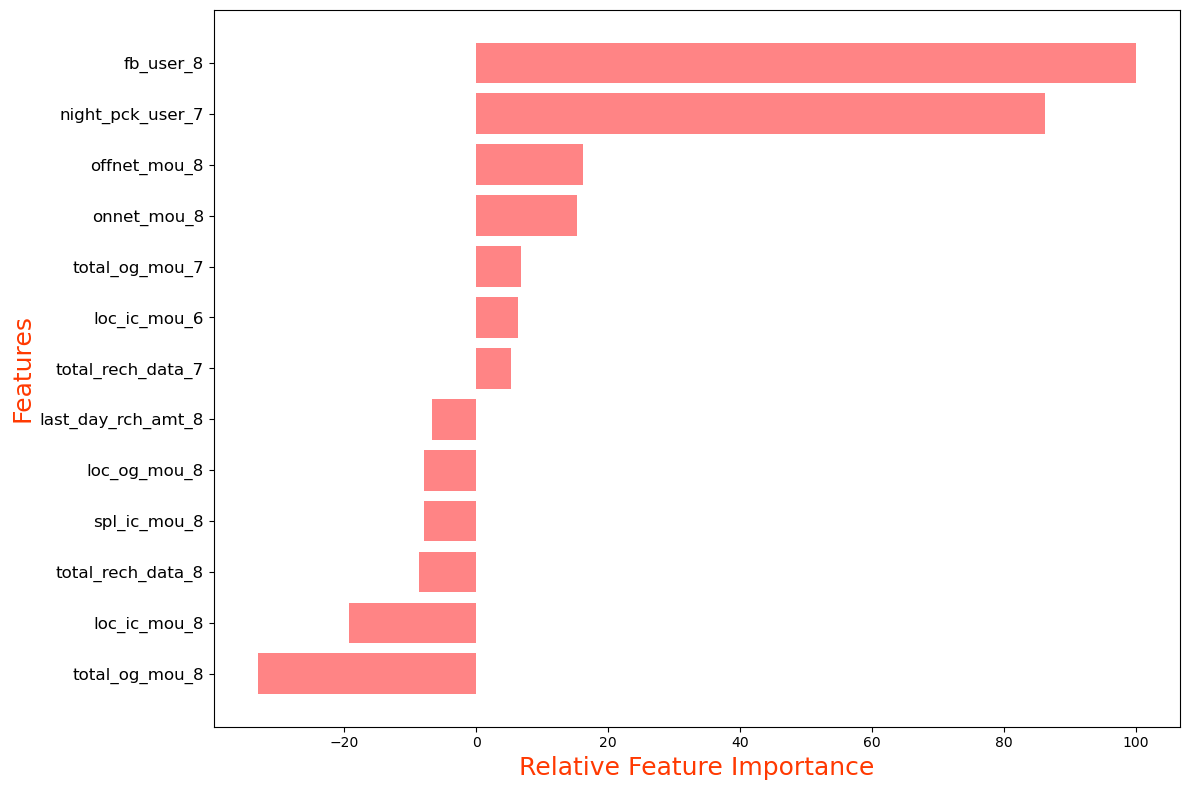

In [180]:
#plot the features importance

p =  np.arange(sorted_imp.shape[0]) + 0.5

fig = plt.figure(figsize=(12,8))
ax= fig.add_subplot(1,1,1)
ax.barh(p, feature_imp[sorted_imp], align='center', color= '#ff6667', alpha=0.8)
ax.set_yticks(p)

ax.set_yticklabels(np.array(X_train[cols].columns)[sorted_imp], fontsize =12)
ax.set_xlabel('Relative Feature Importance', fontsize= 18, color='#ff3901')
ax.set_ylabel('Features', fontsize= 18, color='#ff3901')

plt.tight_layout()
plt.show()


### Compare distributions between churn and non-churn customers based on crucial predictos

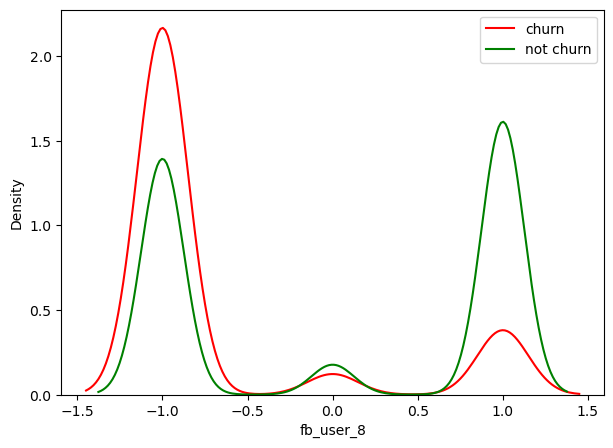

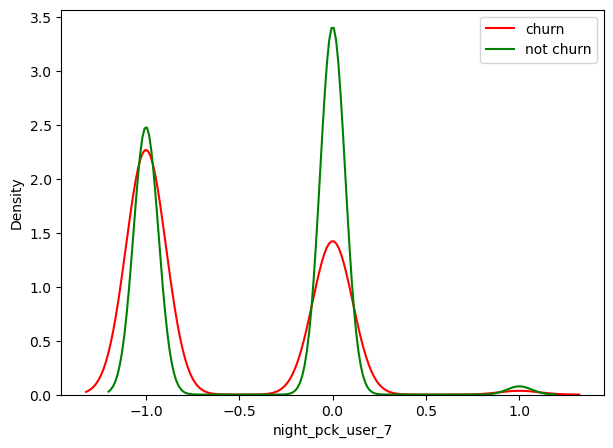

In [181]:
### fb_user_8

fig = plt.figure(figsize= (7, 5))
sns.distplot(churn_df['fb_user_8'], label='churn', color='red', hist=False)
sns.distplot(non_churn_df['fb_user_8'], label='not churn',  color='green', hist=False)
plt.legend()
plt.show()

### night_pck_user_7

fig = plt.figure(figsize= (7, 5))
sns.distplot(churn_df['night_pck_user_7'], label='churn', color='red', hist=False)
sns.distplot(non_churn_df['night_pck_user_7'], label='not churn',  color='green', hist=False)
plt.legend()
plt.show()

#### Interesting pattern observed during July which changes the very next month with a steep rise in churing customers not opting for night pack/social media schemes during the month of August

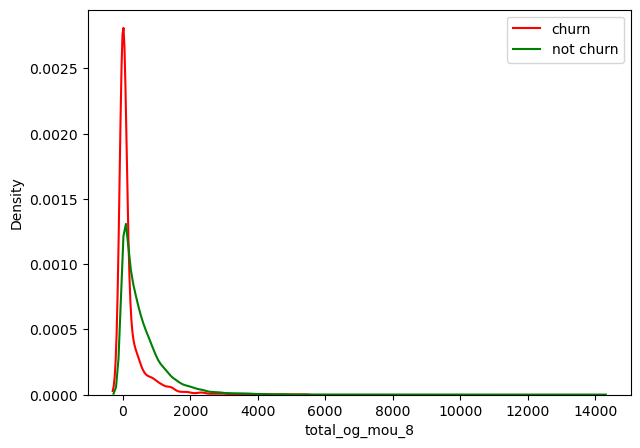

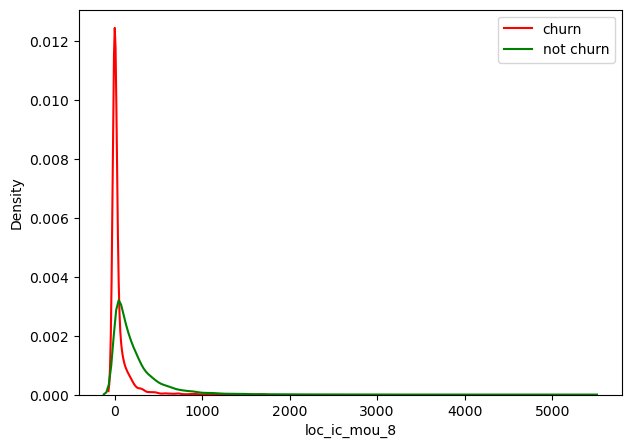

In [182]:
### total_og_mou_8

fig = plt.figure(figsize= (7, 5))
sns.distplot(churn_df['total_og_mou_8'], label='churn', color='red', hist=False)
sns.distplot(non_churn_df['total_og_mou_8'], label='not churn',  color='green', hist=False)
plt.legend()
plt.show()

##loc_ic_mou_8 

fig = plt.figure(figsize= (7, 5))
sns.distplot(churn_df['loc_ic_mou_8'], label='churn', color='red', hist=False)
sns.distplot(non_churn_df['loc_ic_mou_8'], label='not churn',  color='green', hist=False)
plt.legend()
plt.show()

#### Clearly the churning customers form a majority under no incoming/outgoing calls category furing month of August. This indeed is a very strong indicator

## 7.2 High Performance Models (with PCA)

### 7.2.1 PCA  (Dimensionality reduction)

In [183]:
# crucial to ensure we don't have any null values in our data before applying PCA
X_train.isnull().sum()

arpu_6                 0
arpu_7                 0
arpu_8                 0
onnet_mou_6            0
onnet_mou_7            0
                      ..
jul_vbc_3g             0
jun_vbc_3g             0
rech_amt_good_phase    0
onnet_mou_diff         0
offet_mou_diff         0
Length: 148, dtype: int64

In [184]:
#pca = Pipeline([('scaler', StandardScaler()), ('pca', PCA())])
pca = PCA(svd_solver='randomized', random_state=42)

In [185]:
pca.fit(X_train)
telecom_pca = pca.fit_transform(X_train)

In [186]:
## Check the variance explained by PCA selected components

#pca.explained_variance_ratio_
pd.Series(np.round(pca.explained_variance_ratio_.cumsum(), 4)*100)

0      12.27
1      22.88
2      28.83
3      34.51
4      38.77
       ...  
143   100.00
144   100.00
145   100.00
146   100.00
147   100.00
Length: 148, dtype: float64

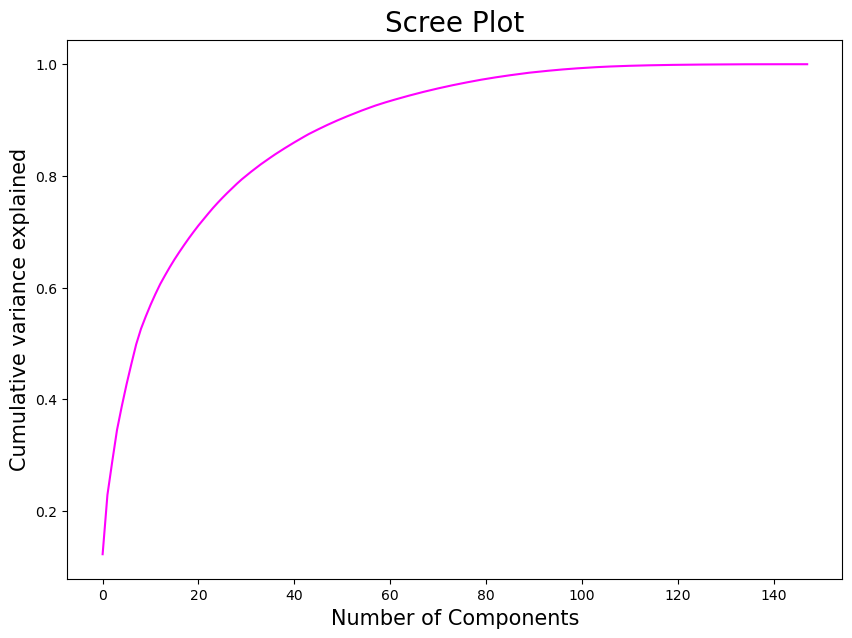

In [187]:
## Plot the feature variance curve as per PCA

feature = range(pca.n_components_)
var = np.cumsum(pca.explained_variance_ratio_)

#we have 100 elements on y-axis and about 175 elements on x-axis
#plt.figure(figsize=(175/20, 100/20))
plt.figure(figsize=(10, 7))
plt.plot(var, color='magenta')
plt.xlabel('Number of Components', fontsize=15)
plt.ylabel('Cumulative variance explained', fontsize=15)
plt.title('Scree Plot', fontsize=20)
plt.show()

#### The scree plot shows that 90% of the variance is explained by around 60 components. We can go ahead with an Incremental PCA approach with these 60 components

### Incremental PCA

In [188]:
from sklearn.decomposition import IncrementalPCA

In [189]:
pca_inc = IncrementalPCA(n_components=60)

In [190]:
#Fit and tranfrom train data
X_train_PCA = pca_inc.fit_transform(X_train)

In [191]:
#apply tranformation on test data
X_test_PCA = pca_inc.transform(X_test)

In [192]:
np.any(np.isnan(X_train))


False

In [193]:
np.all(np.isfinite(X_train))

True

##  High Performance Models

#### We try the following four models and then compare their metrics and choose accordingly :
    
    1. Logistic Regression
    2. Random Forest (Ensembles)
    3. Support vector machines (SVM)
    4. Extreme Gradient Boosting (XGBoost)

### Our prior focus is on the sensitivity and recall and not on accuracy

**We need to focus more upon customers that churn than the ones who don't.** It is okay if the model predicts a few non churning customers as chrun and act accordingly with incentives/discounts. But the churn ones should NOT BE CONSIDERED UNDER "non churn"

    Goal is to retain the customers who are about to churn.


    
### NOTE : We use RandomizedSearchCV instead of GridSearchCV

    As we have a huge dataset --> more than 4k rows and 60 features (post SMOTE & PCA), we will go for RandomizedSearchCV as :
    
 > 1. It is highly efficient technique that determines the optimam set of hyperparameters in fewer iterations (shorter time)
        
 > 2. It moves within the grid in a random fashion rather than performing exhaustive search of hyperparameters and produces almost same results as GridSearchCV in much less time

### 7.2.2 MODEL 1 - Logistic Regression

As **Logistic Regression is meant for Classification problems, it by default becomes the top choice for our model**. 

    We will start with simple Logistic regression and further use hyperparameter tuning to improve the performance

In [194]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
#solver = 'lbfgs', class_weight='balanced')

In [195]:
X_train_PCA.shape, y_train.shape

((41338, 60), (41338,))

In [196]:
lr.fit(X_train_PCA, y_train)

LogisticRegression()

In [197]:
## check predictions on test data

y_pred = lr.predict(X_test_PCA)

#confusion matrix
cm = confusion_matrix(y_test, y_pred)
print('confusion matrix \t\n', cm)

confusion matrix 	
 [[5706 1185]
 [ 111  499]]


In [198]:
print("Accuracy is \t", metrics.accuracy_score(y_test, y_pred).round(2))
print("Sensitivity is \t", (cm[1,1]/(cm[1,0]+cm[1,1])).round(2))
print("Specificity is \t", (cm[0,0]/(cm[0,0]+cm[0,1])).round(2))
print('Area under the curve (AUC) is \t', round(roc_auc_score(y_test, y_pred), 2))

Accuracy is 	 0.83
Sensitivity is 	 0.82
Specificity is 	 0.83
Area under the curve (AUC) is 	 0.82


### Logistic Regression with Hyper Parameter Tuning

In [199]:
logistic = LogisticRegression()
#solver = 'lbfgs', class_weight ='balanced'
penalty = ['l1', 'l2', 'elasticnet']

p = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
grid_params = dict(penalty=penalty, C=p)

#perform stratified k-folds CV (k=5)
#folds = StratifiedKFold(n_splits = 5, shuffle=True, random_state = 4)
folds = 5

#RandomizedSearchCV
logistic_model = RandomizedSearchCV(estimator = logistic,
                             param_distributions = grid_params,
                             cv=None,
                             scoring = 'recall',
                             verbose=1,
                             return_train_score = True,
                             refit= True,
                             n_jobs = -1)

### Note : Important parameters of RandomizedSearchCV

> **cv :** Determines the cross-validation splitting strategy. **None specifies the default 5 folds.**

> **scoring :** Strategy to evaluate the performance of the cross-validated model on the test set. **Here we focus on Sensitivity/Recall.**
    
> **n_jobs:** Specifies number of cores to use for key machine learning tasks.
    **with n_jobs = 1 it uses 100% of the cpu of one of the cores.** Each process is run in a different core. n_jobs is an integer, specifying the maximum number of concurrently running workers. If 1 is given, no joblib parallelism is used at all, which is useful for debugging. If set to -1, all CPUs are used.

> **verbose** Controls the verbosity: the higher, the more messages. We use verbose=1, which includes both progress bar and one line per epoch
    
> **return_train_score** default=False  : If set to true, it returns the training scores (used to get insights on how parameter settings impact the overfitting/underfitting trade-off.)

In [200]:
#fit model

logistic_model.fit(X_train_PCA, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    8.2s finished


RandomizedSearchCV(estimator=LogisticRegression(), n_jobs=-1,
                   param_distributions={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10,
                                              100, 1000],
                                        'penalty': ['l1', 'l2', 'elasticnet']},
                   return_train_score=True, scoring='recall', verbose=1)

In [201]:
# check results post Cross validation

cv_results = pd.DataFrame(logistic_model.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_penalty,param_C,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.06,0.01,0.00,0.00,l1,0.00,"{'penalty': 'l1', 'C': 0.0001}",NaN,NaN,NaN,...,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.75,0.07,0.02,0.01,l2,0.10,"{'penalty': 'l2', 'C': 0.1}",0.85,0.87,0.87,...,0.86,0.01,2,0.86,0.86,0.86,0.86,0.86,0.86,0.00
2,0.73,0.08,0.01,0.00,l2,0.01,"{'penalty': 'l2', 'C': 0.01}",0.84,0.86,0.87,...,0.86,0.01,3,0.86,0.86,0.86,0.86,0.86,0.86,0.00
3,0.08,0.03,0.00,0.00,elasticnet,0.00,"{'penalty': 'elasticnet', 'C': 0.0001}",NaN,NaN,NaN,...,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.08,0.01,0.00,0.00,elasticnet,1000,"{'penalty': 'elasticnet', 'C': 1000}",NaN,NaN,NaN,...,NaN,NaN,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [202]:
# select the best hyperparams

print('Best Recall score is : ', logistic_model.best_score_)
print('Best Hyperparameters are : ', logistic_model.best_params_)

Best Recall score is :  0.8583864914430223
Best Hyperparameters are :  {'penalty': 'l2', 'C': 10}


#### Refit the model as per the best hyper params

In [203]:
logistic_reg = LogisticRegression(C=logistic_model.best_params_['C'], penalty=logistic_model.best_params_['penalty'])
logistic_reg_model = logistic_reg.fit(X_train_PCA, y_train)

In [204]:
## check predictions on train data

y_pred_train = logistic_reg_model.predict(X_train_PCA)

#confusion matrix
cm = confusion_matrix(y_train, y_pred_train)
print('confusion matrix \t\n', cm)

print("Accuracy is \t", metrics.accuracy_score(y_train, y_pred_train).round(2))
print("Sensitivity is \t", (cm[1,1]/(cm[1,0]+cm[1,1])).round(2))
print("Specificity is \t", (cm[0,0]/(cm[0,0]+cm[0,1])).round(2))

y_pred_proba_train =  logistic_reg_model.predict_proba(X_train_PCA)[:, 1]
print('Area under the curve (AUC) is \t', round(roc_auc_score(y_train, y_pred_proba_train), 2))

confusion matrix 	
 [[16997  3672]
 [ 2903 17766]]
Accuracy is 	 0.84
Sensitivity is 	 0.86
Specificity is 	 0.82
Area under the curve (AUC) is 	 0.92


#### Check predictions on test data

In [205]:
y_pred =  logistic_reg_model.predict(X_test_PCA)

#confusion matrix
cm = confusion_matrix(y_test, y_pred)
print('confusion matrix \t\n', cm)

print("Accuracy is \t", metrics.accuracy_score(y_test, y_pred).round(2))
print("Sensitivity is \t", (cm[1,1]/(cm[1,0]+cm[1,1])).round(2))
print("Specificity is \t", (cm[0,0]/(cm[0,0]+cm[0,1])).round(2))
y_pred_proba =  logistic_reg_model.predict_proba(X_test_PCA)[:, 1]
print('Area under the curve (AUC) is \t', round(roc_auc_score(y_test, y_pred_proba), 2))

confusion matrix 	
 [[5706 1185]
 [ 111  499]]
Accuracy is 	 0.83
Sensitivity is 	 0.82
Specificity is 	 0.83
Area under the curve (AUC) is 	 0.9


### Model Summary (Logistic Regression)

**Train Set**

        Accuracy is 0.84
    
        Sensitivity is 0.86
        
        Specificity is  0.82
        
        Area under the curve (AUC) is  0.92

**Test Set**

        Accuracy is  0.83

        Sensitivity is  0.82

        Specificity is  0.83

        Area under the curve (AUC) is 0.90

### 7.2.2  MODEL 2 - Random Forest

#### Random Forest algorithm is an Ensemble of decision trees that uses Bagging (Bootstrap aggregation) to generate different base models.

The reason we choose to try Random Forest here is due to the  it's ability to **overcome issues with a single model (less diverse and) that are overcome by using ENSEMBLES**

**Random Forests (collection of decision trees) are the best available Ensembles which ensure :**
    
    Diversity (as each tree is independent of the other)
    Stability (has lower variance than a single decision tree)
    Acceptability (each model is better than a random guesser)
    Parallelisation (best use of multi-core CPU as 2 trees can be built separately)
    
    
**Only  issue is they aren't very interpretable. But as we are focussing on high performance model here, interpretability is not a major concern here.**

#### With Default Hyperparameters

In [206]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_PCA, y_train)

RandomForestClassifier()

In [207]:
#check predictions made
pred = rf_model.predict(X_test_PCA)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95      6891
           1       0.47      0.51      0.49       610

    accuracy                           0.91      7501
   macro avg       0.71      0.73      0.72      7501
weighted avg       0.92      0.91      0.91      7501



In [208]:
#confusion matrix
print(confusion_matrix(y_test, pred))

print('Accuracy is : ', accuracy_score(y_test, pred))

[[6535  356]
 [ 299  311]]
Accuracy is :  0.9126783095587255


#### With Hyperparameter Tuning

In [209]:
# perform k-fold cross validation 
n_fold = 5
params = {'max_depth' : range(2, 20,5)}

#instantiate the model
rf_model = RandomForestClassifier(class_weight = 'balanced', random_state=42)

##RandomizedSearchCV
rf_model = RandomizedSearchCV(rf_model,
                        params, cv=None,
                        scoring ='recall', 
                        verbose=1, n_jobs =-1, 
                        return_train_score=True)

rf_model.fit(X_train_PCA, y_train)
print(rf_model.best_score_)
print(rf_model.best_params_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  2.3min finished


0.9711158994867206
{'max_depth': 17}


In [210]:
#score post RandomizedSearchCV

score = rf_model.cv_results_
pd.DataFrame(score).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,13.68,0.14,0.19,0.02,2,{'max_depth': 2},0.80,0.84,0.85,0.81,...,0.83,0.02,4,0.83,0.83,0.83,0.83,0.83,0.83,0.00
1,39.09,0.15,0.25,0.00,7,{'max_depth': 7},0.85,0.88,0.89,0.86,...,0.87,0.01,3,0.89,0.89,0.89,0.88,0.89,0.89,0.00
2,57.52,0.52,0.36,0.03,12,{'max_depth': 12},0.95,0.96,0.96,0.95,...,0.95,0.00,2,0.99,0.99,0.99,0.99,0.99,0.99,0.00
3,64.66,1.21,0.37,0.01,17,{'max_depth': 17},0.97,0.97,0.98,0.97,...,0.97,0.00,1,1.00,1.00,1.00,1.00,1.00,1.00,0.00


#### We know that Ensembles often lead to overfitting and hence it's important to keep a check on the max_depth

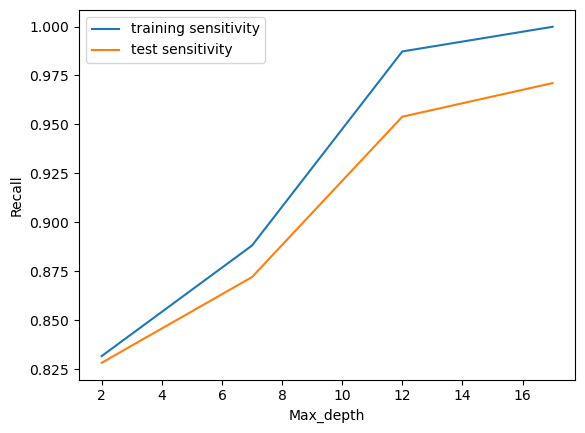

In [211]:
#Compare accuracy of train and test-data with max_depth

plt.figure()
plt.plot(score['param_max_depth'],
        score['mean_train_score'],
        label='training sensitivity')

plt.plot(score['param_max_depth'],
        score['mean_test_score'],
        label='test sensitivity')

plt.xlabel('Max_depth')
plt.ylabel('Recall')
plt.legend()
plt.show()

#### It is evident from the above plot that the model tends to overfit as the max_depth increases. 

    Hence we will now tune the n_estimators and check the overall accuracy. 

#### For this we will keep the max_depth to a low optimal value in order to avoid any overfitting

### Tune n_estimators for Random Forest

In [212]:
# perform k-fold cross validation 
n_fold = 5
params = {'n_estimators' : range(100, 1500, 500)}

#instantiate the model
rf_model = RandomForestClassifier(max_depth=4, class_weight = 'balanced', random_state=42)

#fit the tree on train data
rf_model = RandomizedSearchCV(rf_model, params, cv=None,
                       scoring='recall', verbose=1,
                       n_jobs =-1, return_train_score=True)

rf_model.fit(X_train_PCA, y_train)
print(rf_model.best_score_)
print(rf_model.best_params_)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  6.7min finished


0.83951766558261
{'n_estimators': 100}


In [213]:
#score post GridSearchCV

score = rf_model.cv_results_
pd.DataFrame(score).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,25.00,0.22,0.20,0.02,100,{'n_estimators': 100},0.82,0.85,0.86,0.83,...,0.84,0.01,1,0.84,0.84,0.84,0.85,0.84,0.84,0.00
1,146.31,5.39,1.04,0.02,600,{'n_estimators': 600},0.81,0.84,0.85,0.82,...,0.83,0.01,2,0.84,0.84,0.84,0.84,0.84,0.84,0.00
2,254.90,5.07,2.08,0.22,1100,{'n_estimators': 1100},0.81,0.84,0.85,0.82,...,0.83,0.01,3,0.84,0.84,0.84,0.84,0.84,0.84,0.00


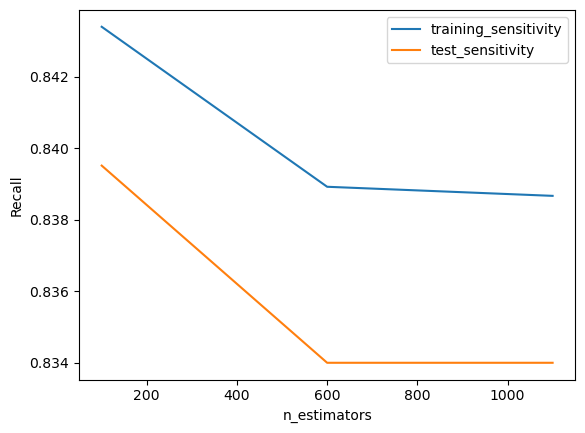

In [214]:
#Compare accuracy of train and test-data with max_depth

plt.figure()
plt.plot(score['param_n_estimators'],
        score['mean_train_score'],
        label='training_sensitivity')

plt.plot(score['param_n_estimators'],
        score['mean_test_score'],
        label='test_sensitivity')

plt.xlabel('n_estimators')
plt.ylabel('Recall')
plt.legend()
plt.show()

### Tune max_features for Random Forest

In [215]:
# perform k-fold cross validation 
n_fold = 5
params = {'max_features' : [4, 8, 14, 20, 24]}

#instantiate the model
rf_model = RandomForestClassifier(max_depth=4, class_weight = 'balanced', random_state=42)

#fit the tree on train data
rf_model = RandomizedSearchCV(rf_model, params, cv=None,
                       scoring='recall', verbose=1,
                       n_jobs =-1, return_train_score=True)

rf_model.fit(X_train_PCA, y_train)
print(rf_model.best_score_)
print(rf_model.best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  3.0min finished


0.8404369658070884
{'max_features': 8}


In [216]:
#score post #RandomizedSearchCV

score = rf_model.cv_results_
pd.DataFrame(score).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,15.98,1.25,0.22,0.03,4,{'max_features': 4},0.81,0.85,0.86,0.83,...,0.84,0.02,2,0.85,0.84,0.84,0.84,0.84,0.84,0.00
1,25.91,1.13,0.20,0.02,8,{'max_features': 8},0.82,0.85,0.85,0.83,...,0.84,0.01,1,0.85,0.84,0.84,0.85,0.84,0.84,0.00
2,47.01,3.66,0.22,0.04,14,{'max_features': 14},0.80,0.83,0.83,0.82,...,0.82,0.01,4,0.83,0.83,0.82,0.83,0.83,0.83,0.00
3,64.94,4.69,0.20,0.02,20,{'max_features': 20},0.80,0.83,0.84,0.82,...,0.82,0.01,3,0.83,0.83,0.83,0.83,0.83,0.83,0.00
4,72.05,2.47,0.18,0.01,24,{'max_features': 24},0.80,0.83,0.84,0.81,...,0.82,0.01,5,0.82,0.82,0.82,0.83,0.82,0.82,0.00


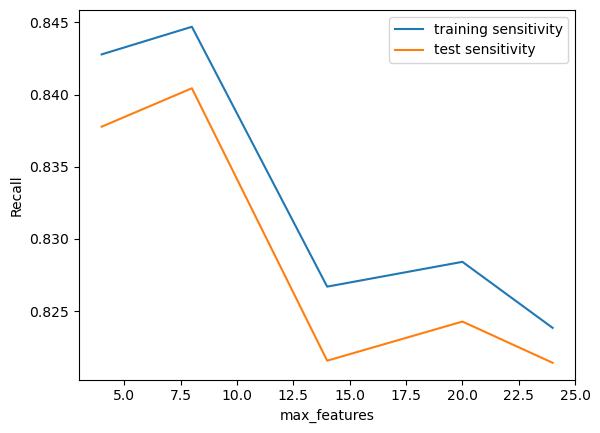

In [217]:
#Compare accuracy of train and test-data with max_depth

plt.figure()
plt.plot(score['param_max_features'],
        score['mean_train_score'],
        label='training sensitivity')

plt.plot(score['param_max_features'],
        score['mean_test_score'],
        label='test sensitivity')

plt.xlabel('max_features')
plt.ylabel('Recall')
plt.legend()
plt.show()

### Tune min_sample_leaf for Random Forest

In [218]:
# perform k-fold cross validation 
n_fold = 5
params = {'min_samples_leaf' : range(100, 400, 50)}

#instantiate the model
rf_model = RandomForestClassifier(class_weight = 'balanced', random_state=42)

#fit the tree on train data
rf_model = RandomizedSearchCV(rf_model, params, cv=None,
                       scoring='recall', verbose=1,
                       n_jobs =-1, return_train_score=True)

rf_model.fit(X_train_PCA, y_train)
print(rf_model.best_score_)
print(rf_model.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  2.9min finished


0.8433399107166164
{'min_samples_leaf': 100}


In [219]:
#score post RandomizedSearchCV

score = rf_model.cv_results_
pd.DataFrame(score).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,48.87,1.67,0.32,0.02,100,{'min_samples_leaf': 100},0.82,0.86,0.86,0.84,...,0.84,0.02,1,0.86,0.86,0.85,0.86,0.86,0.86,0.00
1,46.34,1.45,0.28,0.01,150,{'min_samples_leaf': 150},0.81,0.84,0.85,0.83,...,0.83,0.02,2,0.85,0.84,0.84,0.85,0.84,0.84,0.00
2,43.87,0.72,0.30,0.01,200,{'min_samples_leaf': 200},0.79,0.83,0.85,0.82,...,0.82,0.02,3,0.84,0.83,0.83,0.84,0.83,0.83,0.00
3,41.81,0.30,0.27,0.01,250,{'min_samples_leaf': 250},0.79,0.83,0.84,0.81,...,0.82,0.02,4,0.83,0.82,0.82,0.83,0.83,0.83,0.00
4,40.17,1.46,0.26,0.03,300,{'min_samples_leaf': 300},0.78,0.83,0.83,0.80,...,0.82,0.02,5,0.82,0.82,0.82,0.82,0.82,0.82,0.00


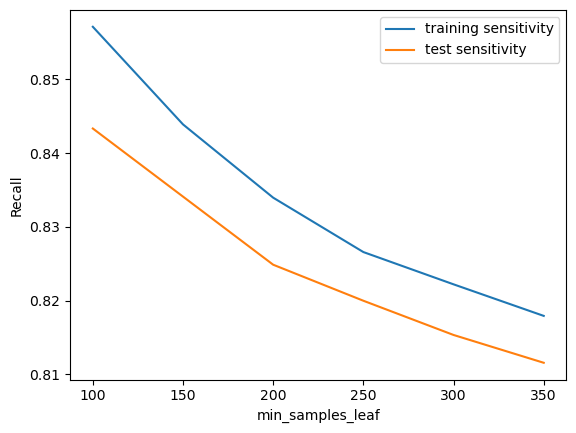

In [220]:
#Compare accuracy of train and test-data with max_depth

plt.figure()
plt.plot(score['param_min_samples_leaf'],
        score['mean_train_score'],
        label='training sensitivity')

plt.plot(score['param_min_samples_leaf'],
        score['mean_test_score'],
        label='test sensitivity')

plt.xlabel('min_samples_leaf')
plt.ylabel('Recall')
plt.legend()
plt.show()

### Tune min_samples_split for Random Forest

In [221]:
# perform k-fold cross validation 
n_fold = 5
params = {'min_samples_split' : range(200, 500, 50)}

#instantiate the model
rf_model = RandomForestClassifier(class_weight = 'balanced', random_state=42)

#fit the tree on train data
rf_model = RandomizedSearchCV(rf_model, params, cv=None,
                       scoring='recall', verbose=1,
                       n_jobs =-1, return_train_score=True)

rf_model.fit(X_train_PCA, y_train)
print(rf_model.best_score_)
print(rf_model.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  4.2min finished


0.8548547795944497
{'min_samples_split': 200}


In [222]:
#score post RandomizedSearchCV

score = rf_model.cv_results_
pd.DataFrame(score).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,67.27,0.49,0.38,0.02,200,{'min_samples_split': 200},0.82,0.87,0.87,0.85,...,0.85,0.02,1,0.88,0.88,0.88,0.88,0.88,0.88,0.00
1,65.38,0.90,0.35,0.02,250,{'min_samples_split': 250},0.81,0.86,0.87,0.84,...,0.84,0.02,2,0.87,0.86,0.86,0.87,0.86,0.87,0.00
2,62.84,1.28,0.35,0.02,300,{'min_samples_split': 300},0.81,0.85,0.86,0.83,...,0.84,0.02,3,0.86,0.86,0.86,0.86,0.86,0.86,0.00
3,61.34,0.40,0.34,0.02,350,{'min_samples_split': 350},0.80,0.85,0.85,0.83,...,0.83,0.02,4,0.85,0.85,0.84,0.85,0.85,0.85,0.00
4,58.49,1.83,0.32,0.01,400,{'min_samples_split': 400},0.80,0.84,0.85,0.82,...,0.83,0.02,5,0.85,0.84,0.84,0.84,0.85,0.84,0.00


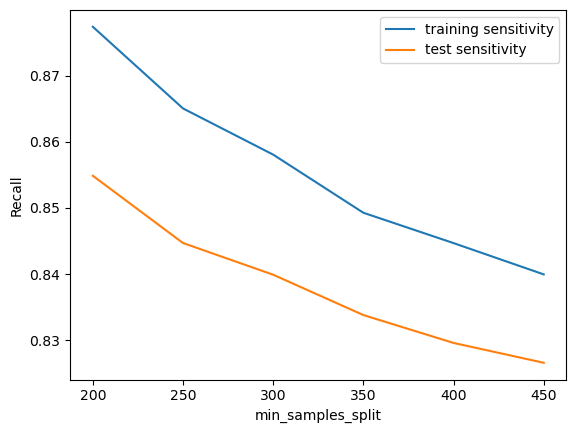

In [223]:
#Compare accuracy of train and test-data with max_depth

plt.figure()
plt.plot(score['param_min_samples_split'],
        score['mean_train_score'],
        label='training sensitivity')

plt.plot(score['param_min_samples_split'],
        score['mean_test_score'],
        label='test sensitivity')

plt.xlabel('min_samples_split')
plt.ylabel('Recall')
plt.legend()
plt.show()

### Grid Search For Final Optimal Hyperparameters

This time cv will take longer than usual as we will have multiple features and folds to run

In [224]:
grid_params = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split' : range(200, 500, 200),
    'n_estimators' : [300, 500],
    'max_features' : [8, 10]
}

rf_model = RandomForestClassifier()
grid_search = RandomizedSearchCV(estimator = rf_model, param_distributions = grid_params, scoring='recall', cv=3, n_jobs = -1, verbose=1)

In [225]:
grid_search.fit(X_train_PCA, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 11.0min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [4, 8, 10],
                                        'max_features': [8, 10],
                                        'min_samples_leaf': range(100, 400, 200),
                                        'min_samples_split': range(200, 500, 200),
                                        'n_estimators': [300, 500]},
                   scoring='recall', verbose=1)

In [226]:
## get the optimal accuracy score and hyperparameters
print('We have now achieved the Sensitivity of : ', grid_search.best_score_, 'using', grid_search.best_params_)

We have now achieved the Sensitivity of :  0.848323849545102 using {'n_estimators': 500, 'min_samples_split': 200, 'min_samples_leaf': 100, 'max_features': 10, 'max_depth': 8}


In [227]:
## New model with the best hyperparameters

from sklearn.ensemble import RandomForestClassifier
rfm = RandomForestClassifier(bootstrap=True, class_weight='balanced',
                            max_depth=grid_search.best_params_['max_depth'],
                            min_samples_split=grid_search.best_params_['min_samples_split'],
                            max_features = grid_search.best_params_['max_features'],
                            n_estimators = grid_search.best_params_['n_estimators'], random_state=42)

####  Check predictions on test data

In [228]:
rfm.fit(X_train_PCA, y_train)

## check predictions on test data
y_pred = rfm.predict(X_test_PCA)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.85      0.91      6891
           1       0.30      0.75      0.43       610

    accuracy                           0.84      7501
   macro avg       0.64      0.80      0.67      7501
weighted avg       0.92      0.84      0.87      7501



In [229]:
#confusion matrix
cm = confusion_matrix(y_test, y_pred)
print('confusion matrix \t\n', cm)

print('Accuracy is : ', accuracy_score(y_test, pred))
print("Sensitivity is \t", (cm[1,1]/(cm[1,0]+cm[1,1])).round(2))
print("Specificity is \t", (cm[0,0]/(cm[0,0]+cm[0,1])).round(2))
y_pred_proba = rfm.predict_proba(X_test_PCA)[:, 1]
print('Area under the curve (AUC) is \t', round(roc_auc_score(y_test, y_pred_proba), 2))

confusion matrix 	
 [[5839 1052]
 [ 154  456]]
Accuracy is :  0.9126783095587255
Sensitivity is 	 0.75
Specificity is 	 0.85
Area under the curve (AUC) is 	 0.87


 > **Not a great Recall score on test data . However accuracy, AUC and other metrics are on a very high side.**

### Model Summary (Random Forest)

    
#### Test Set (after hyperparameter tuning)

    Accuracy is  0.91

    Sensitivity is  0.75

    Specificity is  0.85

    Area under the curve (AUC) is 0.87

### 7.3 MODEL 3 - SVM

> **Support Vector Machines are ideal for a linear/non linear data distribution** and they also further improvise the ide of Logistic Regression.
    
> They work on the idea of providing the **best hyperplane for our data.** In case our data is not linearly separable, SVM provides various kernels like rbf which add dimensions to data to make the categories separable through a hyperplane.
    
> Due to their **robustness and wide applicability**, we choose to use it here and check how our model performs.
    
**Please note :**

On applying linear kernel we didn't get good results (as data here is not linearly separable). We will hence go for **non-linear/rbf kernel**

In [230]:
X_train_PCA.shape, y_train.shape

((41338, 60), (41338,))

In [231]:
model = SVC(kernel='rbf', class_weight='balanced')
model.fit(X_train_PCA, y_train)

# predictions on test set
y_pred = model.predict(X_test_PCA)

In [232]:
# check accuracy
print('accuracy is : ', accuracy_score(y_true=y_test, y_pred=y_pred))

#confusion matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix \t\n', cm)

accuracy is :  0.892680975869884
Confusion matrix 	
 [[6253  638]
 [ 167  443]]


### SVM with Hyper Parameter Tuning

**C :** refers to the regularization parameter

**gamma :** It handles non-linear classifications

In [233]:
# perform k-fold cross validation

fold = StratifiedKFold(n_splits = 3, shuffle=True, random_state=42)

#set hyper-params for cv
hyper_params = [{'gamma' : [1e-2, 1e-3, 1e-4],
                'C': [1, 10, 100,1000]}]

model_svc = SVC(class_weight = 'balanced', random_state =42, kernel='rbf')
cv_model = RandomizedSearchCV(estimator= model_svc,
                       param_distributions=hyper_params,
                       scoring='recall',
                       cv = 3,
                       verbose=1, return_train_score=True, n_jobs= -1)

cv_model.fit(X_train_PCA, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 21.9min finished


RandomizedSearchCV(cv=3,
                   estimator=SVC(class_weight='balanced', random_state=42),
                   n_jobs=-1,
                   param_distributions=[{'C': [1, 10, 100, 1000],
                                         'gamma': [0.01, 0.001, 0.0001]}],
                   return_train_score=True, scoring='recall', verbose=1)

In [234]:
#score post GridSearchCV

cv_results = pd.DataFrame(cv_model.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_gamma,param_C,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,139.23,18.08,37.98,1.24,0.00,1,"{'gamma': 0.001, 'C': 1}",0.85,0.85,0.86,0.85,0.00,8,0.86,0.85,0.86,0.86,0.01
1,591.16,41.45,20.41,1.54,0.00,1000,"{'gamma': 0.001, 'C': 1000}",0.97,0.98,0.98,0.98,0.01,3,0.98,0.98,0.98,0.98,0.00
2,136.66,16.28,37.70,3.71,0.00,100,"{'gamma': 0.0001, 'C': 100}",0.86,0.86,0.86,0.86,0.00,7,0.87,0.86,0.86,0.86,0.01
3,141.32,14.43,36.40,1.39,0.00,10,"{'gamma': 0.0001, 'C': 10}",0.84,0.84,0.85,0.84,0.00,9,0.85,0.84,0.85,0.84,0.00
4,114.42,10.86,34.59,0.27,0.00,10,"{'gamma': 0.001, 'C': 10}",0.90,0.90,0.91,0.90,0.00,6,0.91,0.90,0.90,0.91,0.00
5,123.55,19.48,30.93,1.34,0.01,1,"{'gamma': 0.01, 'C': 1}",0.95,0.95,0.96,0.95,0.00,4,0.96,0.96,0.96,0.96,0.00
6,241.37,11.87,33.68,2.64,0.00,1000,"{'gamma': 0.0001, 'C': 1000}",0.90,0.90,0.91,0.90,0.01,5,0.91,0.90,0.90,0.91,0.00
7,163.47,14.36,48.33,1.14,0.00,1,"{'gamma': 0.0001, 'C': 1}",0.84,0.84,0.84,0.84,0.00,10,0.84,0.84,0.84,0.84,0.00
8,273.59,28.40,13.53,1.89,0.01,100,"{'gamma': 0.01, 'C': 100}",0.99,1.00,1.00,1.00,0.00,1,1.00,1.00,1.00,1.00,0.00
9,257.07,13.40,9.98,0.50,0.01,1000,"{'gamma': 0.01, 'C': 1000}",0.99,1.00,1.00,0.99,0.01,2,1.00,1.00,1.00,1.00,0.00


#### Check recall score for different gamma values

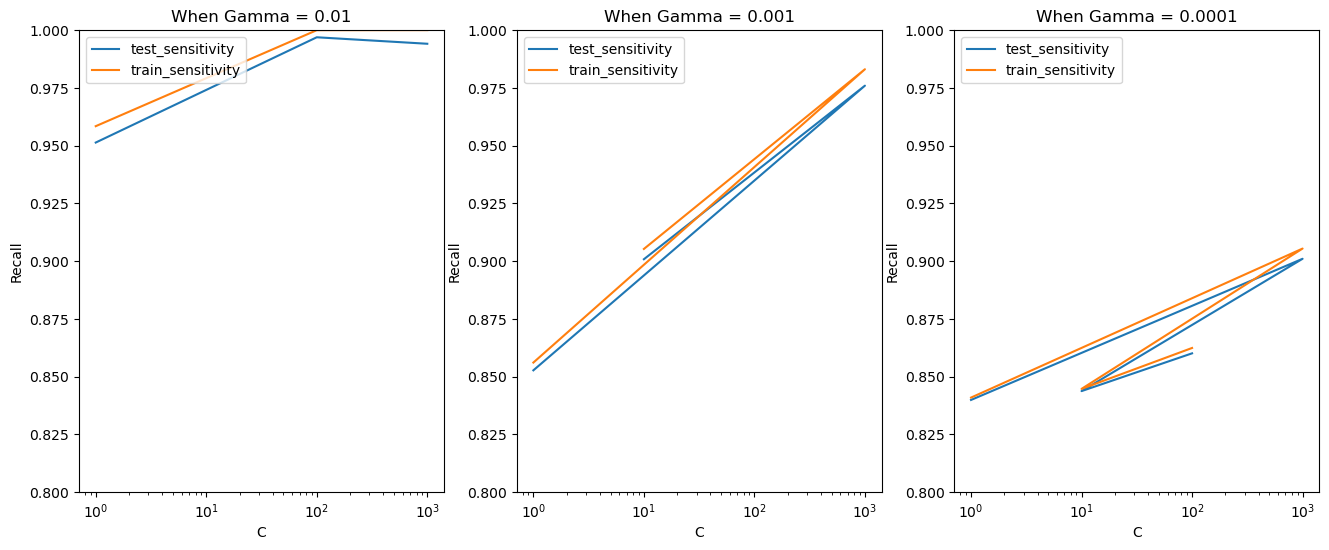

In [235]:
cv_results['param_C'] = cv_results['param_C'].astype('int')

plt.figure(figsize=(16,6))

#subplot 1
plt.subplot(131)
gamma_1 = cv_results[cv_results['param_gamma']==0.01]
plt.plot(gamma_1['param_C'], gamma_1['mean_test_score'])
plt.plot(gamma_1['param_C'], gamma_1['mean_train_score'])
plt.xlabel('C')
plt.ylabel('Recall')
plt.title('When Gamma = 0.01')
plt.ylim([0.80, 1])
plt.legend(['test_sensitivity', 'train_sensitivity'], loc='upper left')
plt.xscale('log')

#subplot 2
plt.subplot(132)
gamma_2 = cv_results[cv_results['param_gamma']==0.001]
plt.plot(gamma_2['param_C'], gamma_2['mean_test_score'])
plt.plot(gamma_2['param_C'], gamma_2['mean_train_score'])
plt.xlabel('C')
plt.ylabel('Recall')
plt.title('When Gamma = 0.001')
plt.ylim([0.80, 1])
plt.legend(['test_sensitivity', 'train_sensitivity'], loc='upper left')
plt.xscale('log')

#subplot 3
plt.subplot(133)
gamma_3 = cv_results[cv_results['param_gamma']==0.0001]
plt.plot(gamma_3['param_C'], gamma_3['mean_test_score'])
plt.plot(gamma_3['param_C'], gamma_3['mean_train_score'])
plt.xlabel('C')
plt.ylabel('Recall')
plt.title('When Gamma = 0.0001')
plt.ylim([0.80, 1])
plt.legend(['test_sensitivity', 'train_sensitivity'], loc='upper left')
plt.xscale('log')

In [236]:
best_score = cv_model.best_score_
best_hyperparams = cv_model.best_params_

print('The best score is {0} and corresponding best hyperparams are {1}'.format(best_score, best_hyperparams))

The best score is 0.9969036900921747 and corresponding best hyperparams are {'gamma': 0.01, 'C': 100}


### Build model using the best optimal hyperparameters

In [237]:
svm_model = SVC(C=100, gamma=0.01, kernel='rbf')
svm_model.fit(X_train_PCA, y_train)

SVC(C=100, gamma=0.01)

#### prediction on train dataset

In [238]:
y_train_pred = svm_model.predict(X_train_PCA)

In [239]:
#confusion matrix
cm = confusion_matrix(y_train, y_train_pred)
print('confusion matrix \t\n', cm)

print('Accuracy is : ', accuracy_score(y_train, y_train_pred))
print("Sensitivity is \t", (cm[1,1]/(cm[1,0]+cm[1,1])).round(2))
print("Specificity is \t", (cm[0,0]/(cm[0,0]+cm[0,1])).round(2))

confusion matrix 	
 [[20511   158]
 [    1 20668]]
Accuracy is :  0.9961536600706372
Sensitivity is 	 1.0
Specificity is 	 0.99


#### Prediction on Test set

In [240]:
y_test_pred = svm_model.predict(X_test_PCA)

In [264]:
#confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
print('confusion matrix \t\n', cm)

print('Accuracy is : ', accuracy_score(y_test, y_test_pred))
print("Sensitivity is \t", (cm[0,0]/(cm[1,1]+cm[1,1])).round(2))
print("Specificity is \t", (cm[0,0]/(cm[0,0]+cm[0,1])).round(2))

confusion matrix 	
 [[20511   158]
 [    1 20668]]
Accuracy is :  0.9130782562325024
Sensitivity is 	 0.99
Specificity is 	 0.99


### Model Summary (SVM)



#### Train Set

    Accuracy is 0.99

    Sensitivity is 1.00

    Specificity is  0.99


    
#### Test Set

    Accuracy is  0.91

    Sensitivity is  0.99

    Specificity is  0.99

 

#### SVM resulted in metrics so far. However it has a very high computational and time complexity

### 7.4 MODEL 4 - XGBoost

#### It is an implementation of Gradient boosted Decision trees designed for speed and performance.

> It is an ensemble technique where new models are built sequentially by minimizing the errors made by previous models while increasing influence of high performance models

In [242]:
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance

In [243]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train_PCA, y_train)

[17:17:44] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [244]:
y_pred = xgb_model.predict(X_test_PCA)

In [245]:
# check accuracy
print('accuracy is : ', accuracy_score(y_true=y_test, y_pred=y_pred))

#confusion matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix \t\n', cm)


accuracy is :  0.9033462205039328
Confusion matrix 	
 [[6421  470]
 [ 255  355]]


In [246]:
#Other metrics

print("Sensitivity is \t", (cm[1,1]/(cm[1,0]+cm[1,1])).round(2))
print("Specificity is \t", (cm[0,0]/(cm[0,0]+cm[0,1])).round(2))
y_pred_proba = xgb_model.predict_proba(X_test_PCA)[:, 1]
print('Area under the curve (AUC) is \t', round(roc_auc_score(y_test, y_pred_proba), 2))

Sensitivity is 	 0.58
Specificity is 	 0.93
Area under the curve (AUC) is 	 0.88


In [247]:
#check predictions made
pred = xgb_model.predict(X_test_PCA)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.96      0.93      0.95      6891
           1       0.43      0.58      0.49       610

    accuracy                           0.90      7501
   macro avg       0.70      0.76      0.72      7501
weighted avg       0.92      0.90      0.91      7501



#### XGBoost with Hyper Parameter Tuning

In [248]:
# perform k-fold cross validation

fold = 5

#set hyper-params for cv
hyper_params = [{'learning_rate' : [0.1, 0.2, 0.3],
                'subsample': [0.3, 0.4, 0.5]}]

xgb_model = XGBClassifier(max_depth = 2, n_estimators=200)
cv_model = RandomizedSearchCV(estimator=xgb_model,
                       param_distributions=hyper_params,
                       scoring='recall',
                       cv = fold,
                       verbose=1, return_train_score=True, n_jobs= -1)

cv_model.fit(X_train_PCA, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:  6.0min finished


[17:24:11] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=2,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=200, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, reg_alpha=None,
                             

In [249]:
#score post GridSearchCV

cv_results = pd.DataFrame(cv_model.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_subsample,param_learning_rate,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,54.44,0.21,0.14,0.02,0.30,0.10,"{'subsample': 0.3, 'learning_rate': 0.1}",0.84,0.87,0.88,...,0.86,0.01,9,0.88,0.87,0.87,0.87,0.87,0.87,0.00
1,60.24,5.62,0.13,0.04,0.40,0.10,"{'subsample': 0.4, 'learning_rate': 0.1}",0.84,0.88,0.88,...,0.87,0.02,8,0.88,0.87,0.87,0.88,0.87,0.87,0.00
2,68.43,0.28,0.11,0.03,0.50,0.10,"{'subsample': 0.5, 'learning_rate': 0.1}",0.84,0.87,0.88,...,0.87,0.01,7,0.88,0.87,0.87,0.87,0.87,0.87,0.00
3,58.62,3.78,0.11,0.03,0.30,0.20,"{'subsample': 0.3, 'learning_rate': 0.2}",0.86,0.89,0.90,...,0.88,0.01,6,0.90,0.89,0.89,0.89,0.89,0.89,0.00
4,58.86,3.27,0.14,0.01,0.40,0.20,"{'subsample': 0.4, 'learning_rate': 0.2}",0.86,0.89,0.90,...,0.88,0.01,5,0.90,0.89,0.89,0.89,0.89,0.89,0.00
5,66.23,0.09,0.13,0.03,0.50,0.20,"{'subsample': 0.5, 'learning_rate': 0.2}",0.86,0.89,0.89,...,0.88,0.01,4,0.90,0.89,0.89,0.89,0.89,0.89,0.00
6,60.34,3.11,0.14,0.01,0.30,0.30,"{'subsample': 0.3, 'learning_rate': 0.3}",0.86,0.90,0.90,...,0.89,0.02,3,0.91,0.91,0.91,0.90,0.90,0.91,0.00
7,58.35,0.56,0.15,0.03,0.40,0.30,"{'subsample': 0.4, 'learning_rate': 0.3}",0.87,0.91,0.91,...,0.89,0.01,1,0.91,0.91,0.91,0.90,0.91,0.91,0.00
8,45.56,0.59,0.08,0.02,0.50,0.30,"{'subsample': 0.5, 'learning_rate': 0.3}",0.86,0.90,0.91,...,0.89,0.02,2,0.91,0.91,0.91,0.90,0.91,0.91,0.00


In [250]:
def xgb_plot(params, cv_results):
    plt.figure(figsize=(18, 6))
    for n, subsample in enumerate(params['subsample']):
        
        plt.subplot(1, len(params['subsample']), n+1)
        df = cv_results[cv_results['param_subsample']==subsample]

        plt.plot(df['param_learning_rate'], df['mean_test_score'])
        plt.plot(df['param_learning_rate'], df['mean_train_score'])
        plt.xlabel('learning_rate')
        plt.ylabel('Recall')
        plt.title('subsample={0}'.format(subsample))

        plt.legend(['test score', 'train score'], loc='right')
        plt.xscale('log')
        

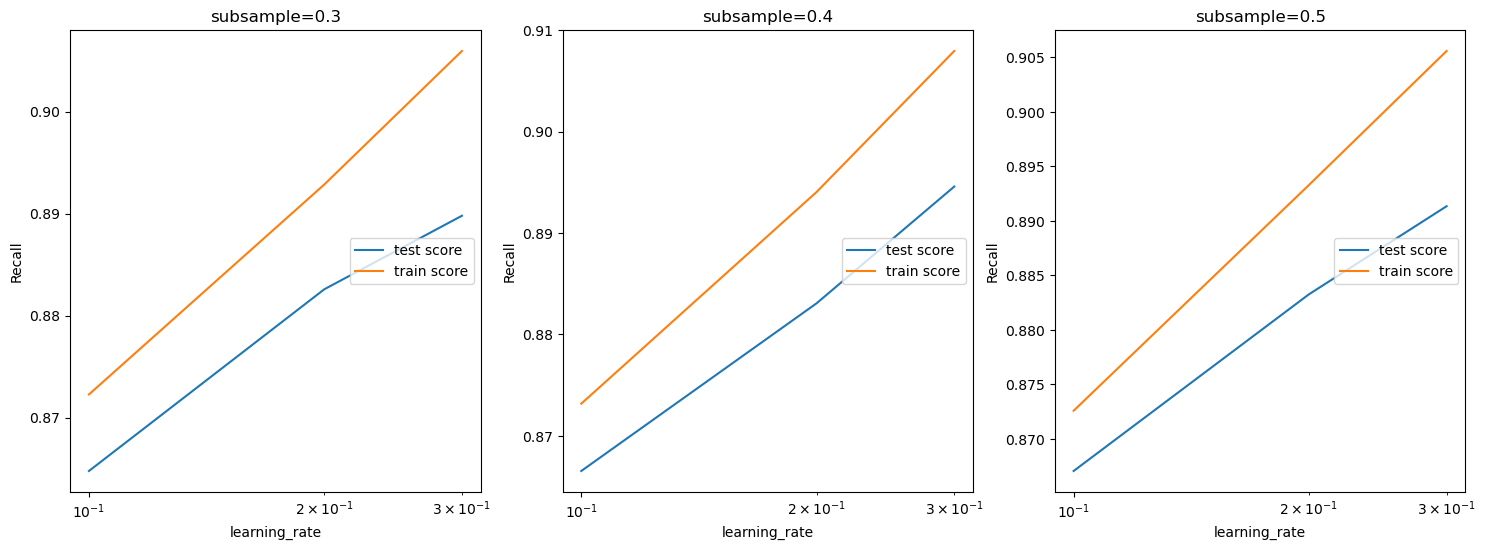

In [251]:
params = {'learning_rate' : [0.1, 0.2, 0.3], 'subsample' : [0.3, 0.4, 0.5]}
xgb_plot(params, cv_results)

#### Observation :

From the above plots it's evident that subsample size and learning_rate do not heavily impact the AUC. 
We will now go ahead and build the final XGBoost model using the chosen hyper params

In [252]:
hyper_params = {'learning_rate' : 0.3,
               'max_depth' : 3,
               'n_estimators' : 200,
               'subsample' : 0.5,
               'objective' : 'binary:logistic'}

xgb_final = XGBClassifier(params = hyper_params, max_depth=2, n_estimators=200)
xgb_final.fit(X_train_PCA, y_train)


[17:24:26] WARNING: ..\src\learner.cc:541: 
Parameters: { params } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:24:27] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=8, num_parallel_tree=1,
              params={'learning_rate': 0.3, 'max_depth': 3, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.5},
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [253]:
y_pred = xgb_final.predict(X_train_PCA)

In [254]:
# check accuracy
print('accuracy is : ', accuracy_score(y_true=y_train, y_pred=y_pred))

#confusion matrix
cm = confusion_matrix(y_train, y_pred)
print('Confusion matrix \t\n', cm)

accuracy is :  0.8903914074217427
Confusion matrix 	
 [[18117  2552]
 [ 1979 18690]]


In [255]:
print("Sensitivity is \t", (cm[1,1]/(cm[1,0]+cm[1,1])).round(2))
print("Specificity is \t", (cm[0,0]/(cm[0,0]+cm[0,1])).round(2))
y_pred_proba = xgb_final.predict_proba(X_train_PCA)[:, 1]
print('Area under the curve (AUC) is \t', round(roc_auc_score(y_train, y_pred_proba), 2))

Sensitivity is 	 0.9
Specificity is 	 0.88
Area under the curve (AUC) is 	 0.96


####  This is the highest value of sensitivity across train data so far

#### Prediction on Test set

In [256]:
y_pred = xgb_final.predict(X_test_PCA)

In [257]:
# check accuracy
print('accuracy is : ', accuracy_score(y_true=y_test, y_pred=y_pred))

#confusion matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix \t\n', cm)

accuracy is :  0.857485668577523
Confusion matrix 	
 [[5975  916]
 [ 153  457]]


In [258]:
print("Sensitivity is \t", (cm[1,1]/(cm[1,0]+cm[1,1])).round(2))
print("Specificity is \t", (cm[0,0]/(cm[0,0]+cm[0,1])).round(2))
y_pred_proba = xgb_final.predict_proba(X_test_PCA)[:, 1]
print('Area under the curve (AUC) is \t', round(roc_auc_score(y_test, y_pred_proba), 2))

Sensitivity is 	 0.75
Specificity is 	 0.87
Area under the curve (AUC) is 	 0.88


## Model Summary (XGBoost)

#### Train Set

    Accuracy is 0.89

    Sensitivity is 0.90

    Specificity is  0.88

    Area under the curve (AUC) is  0.96
    
#### Test Set

    Accuracy is  0.85

    Sensitivity is  0.75

    Specificity is  0.87

    Area under the curve (AUC) is 0.88

## Select Final Model

    We built four different model and compared their performance across train and test data. Now it's time to select our final model.


**Consideration for model selections :**
    
    
    
> The Business problem being considered here is to predict customers who can churn and provide recommendations and insghts based on it.
    
> Hence we focussed throughout on **Recall more as a metric than others**.
    
> **Logistic Regression so far resulted in best metrics** across train and test data. **Logistic Regression also acts as a baseline (benchmark) model** and hence we started our modeeling with it.
    
> Random Forests on the other hands showed **great performance on train and moderate performance on test data**
    
> **SVM (kernel = rbf) despite giving excellent results over train and test data, proved computationally complex and time consuming**
    
> Finally, XGBoost gave great result metrics for train data and fair results on Test data.
    

#### Our motive should always be to go for less complext Model. Considering Occam's Razor, given 2 model with similar performance metrics, we should always choose a more simpler.
    
    
    SVM and Random Forests are both time consuming and computationally expensive. When we already achieved our motive of building a high performance model with the help of Hyperparameter Tuning using Logistic Regression, there is no point opting for heavy and complex models.
    
    
    
    
### Hence considering time, space, computational and cost complexities in mind, we choose to go for ::::::

 > **LOGISTIC REGRESSION MODEL**
    
    
### If time, space and computational complexity is not a major concern, we will recommend SVM over Logistic Regression.

--------------------------------------------------------------------------

## RECOMMENDATIONS AND BUSINESS INSIGHTS

### Insights (based on top indicators)

> The **percentage of actual churn of High value customers is pretty low (which is good), which indicates a reliable service.**

> All calls made within **same operator (T network) and outside T operator are strong indicators.** They are directly related to Churn behaviour.

> **Night pack scheme for the month of July** is a very strong indicator with a direct relation with churn behaviour.

> **Customers using Facebook and social media schemes during August** also have a very strong relationship with churning pattern of customers.

> **Total Outgoing Calls for June and August are also strong indicators.(()) However, total_og_mou_8 is **inversely related** to Churn pattern. So, more the outgoing calls made during Auguest, less likely is the customer to churn.

> **Local and special incoming calls** are also strong indicators. They have an inverse relationship with churning behaviour.** Higher the incoming calls during August, less likely is the customer to churn.

> **Total data recharge amount during July and August are good indicators. For July(total_rech_data_7) it's a direct and for August(total_rech_data_8) an inverse relationship** with a customer churning out.

> **The total number of new onboarded customers shows a decreasing trend** and there are no new customers for the last 6 months. This is a matter of concern

### Recommendations

 > 1.THE COMPANY NEEDS TO FOCUS MORE ON CUSTOMERS WHO WERE **ONBOARDED IN THE LAST 4 YEARS** (more likely to churn). A **regular feedback should be collected from existing High value customers** and accordingly deal with issues (if any).

 > 2. Moreover they should also see why no new customers were onboaded in the last 6 months. **Company needs to focus more on good marketing strategy and campaigns to attract new customers.**

 > 3. **Company should mainly focus on speacial packs and schemes during August Month** since that is the action phase and can make a really big difference in the retaining high value customers
 
 > 4. Once a customer is predicted to fall under churn category, the company should immediate start **reaching out to them and try to rectify the reason** behind their churning behaviour.
    
 > 5. The company should also **introduce new schemes and festive offers for all High value customers.**

 > 6. Keeping a **check on other competitors' schemes and charges** can indeed help them stay ahead in the competitive market.

------------------------------------------------------------------------------------
------------------------------------------------------------------------------------